In [1]:
!pip install -U yellowbrick

     |████████████████████████████████| 276kB 5.7MB/s 
  Found existing installation: yellowbrick 0.9.1
    Uninstalling yellowbrick-0.9.1:
      Successfully uninstalled yellowbrick-0.9.1


In [177]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from yellowbrick.cluster.elbow import kelbow_visualizer

%matplotlib inline
plt.style.use('ggplot')
sns.set(style='darkgrid') 

# **Source Data**


**Customer Data**

* This data contains 2 columns, customer_id and customer_unique_id
* customer_id is used as key to orders data
* customer_unique_id is used as unique identifier for each individual customer






In [178]:
data_customer = pd.read_csv('olist_public_dataset_v2_customers.csv')
data_customer = data_customer.drop_duplicates().reset_index(drop=True)
data_customer.head()

,customer_id,customer_unique_id
0,0000ca4ff2795842fd6b122c6d974468,ac0e5d7f07043dd32831bdad3b99ad26
1,00010f206878ba01f199aec4237de72e,4ed24aaed4079fe0661c0e4b3b420dff
2,00012a2ce6f8dcda20d059ce98491703,7e0e291c0f4fc2d69208954d26ed0586
3,000161a058600d5901f007fab4c27140,ff1dcb27ea444eddb94ea5fea77b875c
4,00017f1d6cce0d56046219a2cfabcbbb,237130c4b6717031ed62d9d0b16fd94f


In [179]:
data_customer.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 96264 entries, 0 to 96263
Data columns (total 2 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   customer_id         96264 non-null  object
 1   customer_unique_id  96264 non-null  object
dtypes: object(2)
memory usage: 1.5+ MB


In [180]:
data_customer.nunique()

customer_id           96264
customer_unique_id    92516
dtype: int64

*   There are 92516 unique customers


In [181]:
total = data_customer.isnull().sum().sort_values(ascending=False)
percent = (100 * data_customer.isnull().sum() / data_customer.isnull().count()).sort_values(ascending=False)
missing_data = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])
missing_data

,Total,Percent
customer_unique_id,0,0.0
customer_id,0,0.0


**Product Data**

*   This data contains 2 columns, product_category_name and product_category_name_english
*   product_category_name represent name for each category in portuguese
*   product_category_name_english represent name for each category in english






In [182]:
data_product = pd.read_csv('product_category_name_translation.csv')
data_product = data_product.drop_duplicates().reset_index(drop=True)
data_product.head()

,product_category_name,product_category_name_english
0,beleza_saude,health_beauty
1,informatica_acessorios,computers_accessories
2,automotivo,auto
3,cama_mesa_banho,bed_bath_table
4,moveis_decoracao,furniture_decor


In [183]:
data_product.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 71 entries, 0 to 70
Data columns (total 2 columns):
 #   Column                         Non-Null Count  Dtype 
---  ------                         --------------  ----- 
 0   product_category_name          71 non-null     object
 1   product_category_name_english  71 non-null     object
dtypes: object(2)
memory usage: 1.2+ KB


In [184]:
data_product.nunique()

product_category_name            71
product_category_name_english    71
dtype: int64

In [185]:
total = data_product.isnull().sum().sort_values(ascending=False)
percent = (100 * data_product.isnull().sum() / data_product.isnull().count()).sort_values(ascending=False)
missing_data = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])
missing_data

,Total,Percent
product_category_name_english,0,0.0
product_category_name,0,0.0


**Payments Data**

*   This data contains order_id, installments, sequential, payment_type, and value 
*   order_id is used as key to order dataset
*   installments represent number of installment on payment
*   sequential represents number of difference payment method for each order
*   value represent the value of the transaction




In [186]:
data_payments = pd.read_csv('olist_public_dataset_v2_payments.csv')
data_payments = data_payments.drop_duplicates().reset_index(drop=True)
data_payments.head()

,order_id,installments,sequential,payment_type,value
0,c3d9e402b6a0fbe2a5f7fc5b41117c38,4,1,credit_card,237.45
1,733d6bf02be72825b2c6f120262b9aa9,1,1,credit_card,165.90
2,b2f6a51bb30b26fbe248117ce5eadcfd,1,1,credit_card,55.95
3,d10b4156a519c3f1bc880f6600d32a59,7,1,credit_card,151.76
4,80606b26965c5ed21e85a085e0667b63,4,1,credit_card,178.11


In [187]:
data_payments.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100892 entries, 0 to 100891
Data columns (total 5 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   order_id      100892 non-null  object 
 1   installments  100892 non-null  int64  
 2   sequential    100892 non-null  int64  
 3   payment_type  100892 non-null  object 
 4   value         100892 non-null  float64
dtypes: float64(1), int64(2), object(2)
memory usage: 3.8+ MB


In [188]:
data_payments.nunique()

order_id        96262
installments       25
sequential         29
payment_type        4
value           27779
dtype: int64

In [189]:
total = data_payments.isnull().sum().sort_values(ascending=False)
percent = (100 * data_payments.isnull().sum() / data_payments.isnull().count()).sort_values(ascending=False)
missing_data = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])
missing_data

,Total,Percent
value,0,0.0
payment_type,0,0.0
sequential,0,0.0
installments,0,0.0
order_id,0,0.0


**Geolocation Data**

*   This data zip_code_prefix, city, state, lat, lng
*   zip_code_prefix represents first 3 digit of zip code
*   city represent city name
*   state represents state name
*   lat represents latitude of the following location
*   lng represents longitude of the following location



In [190]:
data_geolocation = pd.read_csv('geolocation_olist_public_dataset.csv')
data_geolocation = data_geolocation.drop_duplicates().reset_index(drop=True)
data_geolocation.head()

,zip_code_prefix,city,state,lat,lng
0,10,sao paulo,sp,-23.547807,-46.636122
1,10,sao paulo,sp,-23.546081,-46.644820
2,10,sao paulo,sp,-23.540984,-46.642569
3,10,sao paulo,sp,-23.546758,-46.645771
4,10,sao paulo,sp,-23.546362,-46.643073


In [191]:
data_geolocation.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 275854 entries, 0 to 275853
Data columns (total 5 columns):
 #   Column           Non-Null Count   Dtype  
---  ------           --------------   -----  
 0   zip_code_prefix  275854 non-null  int64  
 1   city             275854 non-null  object 
 2   state            275854 non-null  object 
 3   lat              275854 non-null  float64
 4   lng              275854 non-null  float64
dtypes: float64(2), int64(1), object(2)
memory usage: 10.5+ MB


In [192]:
data_geolocation.nunique()

zip_code_prefix       851
city                 5419
state                  27
lat                275588
lng                275614
dtype: int64

In [193]:
total = data_geolocation.isnull().sum().sort_values(ascending=False)
percent = (100 * data_geolocation.isnull().sum() / data_geolocation.isnull().count()).sort_values(ascending=False)
missing_data = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])
missing_data

,Total,Percent
lng,0,0.0
lat,0,0.0
state,0,0.0
city,0,0.0
zip_code_prefix,0,0.0


**Order Data**

This data is the main dataset taht represents ecommerce transactions data

In [194]:
data_order = pd.read_csv('olist_public_dataset_v2.csv')
data_order = data_order.drop_duplicates().reset_index(drop=True)
data_order.head()

,order_id,order_status,order_products_value,order_freight_value,order_items_qty,order_sellers_qty,order_purchase_timestamp,order_aproved_at,order_estimated_delivery_date,order_delivered_customer_date,customer_id,customer_city,customer_state,customer_zip_code_prefix,product_category_name,product_name_lenght,product_description_lenght,product_photos_qty,product_id,review_id,review_score,review_comment_title,review_comment_message,review_creation_date,review_answer_timestamp
0,b95df3cef5297e79ef709ba256518f6f,delivered,349.90,13.84,1,1,2017-01-31 17:19:01.000000,2017-02-01 02:41:21.549551,2017-03-15 00:00:00.000000,2017-02-06 11:04:24.154259,297dcf281305aabfee256d313076af2b,Guaratuba,PR,832,beleza_saude,51,625,1,6cdd53843498f92890544667809f1595,b95df3cef5297e79ef709ba256518f6f,5,NaN,NaN,2017-02-07 00:00:00.000000,2017-02-09 02:37:37+00:00
1,59af46052a799e80e2f0c665c587731d,delivered,15.00,15.10,1,1,2017-09-09 19:52:54.000000,2017-09-10 20:03:31.535281,2017-10-02 00:00:00.000000,2017-09-13 20:17:41.296915,b7563d94162ed0aa3f8d9cada4bcc536,Uberlandia,MG,384,informatica_acessorios,44,1428,2,ae5cad88462eb7b7b61401e31c45618e,59af46052a799e80e2f0c665c587731d,5,NaN,entrega em 2 dias produto c boa qualidade otim...,2017-09-14 00:00:00.000000,2017-09-15 03:43:47+00:00
2,a3e6136894621db402a772c6bc72a12a,delivered,238.90,18.00,1,1,2017-01-30 17:00:09.000000,2017-01-30 17:31:25.438253,2017-03-07 00:00:00.000000,2017-02-06 15:43:04.758566,f102cb15ec41ca30fa2902da06495f6b,Itapevi,SP,66,automotivo,55,637,1,0c9ff9d8ed9b9bdd825487b3a66e05f5,a3e6136894621db402a772c6bc72a12a,5,NaN,produto veio antes do prazo informado muito ob...,2017-02-07 00:00:00.000000,2017-02-10 14:18:53+00:00
3,b675ea5a618922f6e679e30531b8957b,delivered,29.99,18.23,1,1,2018-03-11 18:18:36.000000,2018-03-11 18:30:37.931962,2018-04-03 00:00:00.000000,2018-04-03 20:36:43.778451,e33c250311160298e5b457ca52720a35,Goiania,GO,743,cama_mesa_banho,55,617,1,ad0a798e7941f3a5a2fb8139cb62ad78,b675ea5a618922f6e679e30531b8957b,4,NaN,NaN,2018-04-04 00:00:00.000000,2018-04-05 02:52:31+00:00
4,195a8be6794c487fe6cfbb97b7c61902,delivered,295.99,47.65,1,1,2017-04-20 08:01:08.000000,2017-04-25 08:05:40.405383,2017-05-24 00:00:00.000000,2017-05-04 18:47:45.721758,8a8f7c9a4450f17ba3ee25a5ba821bc7,Recife,PE,511,moveis_decoracao,49,558,2,eaf2046d4c87809247a30050ea13df03,195a8be6794c487fe6cfbb97b7c61902,5,NaN,NaN,2017-05-05 00:00:00.000000,2017-05-08 15:20:18+00:00


In [195]:
data_order.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 25 columns):
 #   Column                         Non-Null Count   Dtype  
---  ------                         --------------   -----  
 0   order_id                       100000 non-null  object 
 1   order_status                   100000 non-null  object 
 2   order_products_value           100000 non-null  float64
 3   order_freight_value            100000 non-null  float64
 4   order_items_qty                100000 non-null  int64  
 5   order_sellers_qty              100000 non-null  int64  
 6   order_purchase_timestamp       100000 non-null  object 
 7   order_aproved_at               99982 non-null   object 
 8   order_estimated_delivery_date  100000 non-null  object 
 9   order_delivered_customer_date  97595 non-null   object 
 10  customer_id                    100000 non-null  object 
 11  customer_city                  100000 non-null  object 
 12  customer_state                 

In [196]:
data_order.nunique()

order_id                         96264
order_status                         7
order_products_value              6080
order_freight_value               7644
order_items_qty                     15
order_sellers_qty                   15
order_purchase_timestamp         95706
order_aproved_at                 96239
order_estimated_delivery_date      480
order_delivered_customer_date    93915
customer_id                      96264
customer_city                     4121
customer_state                      27
customer_zip_code_prefix           851
product_category_name               71
product_name_lenght                 63
product_description_lenght        2727
product_photos_qty                  19
product_id                       24447
review_id                        96264
review_score                         5
review_comment_title              3365
review_comment_message           33782
review_creation_date               668
review_answer_timestamp          95884
dtype: int64

In [197]:
total = data_order.isnull().sum().sort_values(ascending=False)
percent = (100 * data_order.isnull().sum() / data_order.isnull().count()).sort_values(ascending=False)
missing_data = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])
missing_data

,Total,Percent
review_comment_title,91738,91.738
review_comment_message,57511,57.511
order_delivered_customer_date,2405,2.405
order_aproved_at,18,0.018
review_answer_timestamp,0,0.000
customer_id,0,0.000
order_status,0,0.000
order_products_value,0,0.000
order_freight_value,0,0.000
order_items_qty,0,0.000


# **Data Integration**



*   Merge datasets by using order data as the main dataset
*   Merge with customer data using customer_id as key
*   Merge with product data using product_category_name as key
*   Merge with paymetn data using order_id as key






In [198]:
data_merged = pd.merge(data_order, data_customer, on='customer_id').reset_index(drop=True)
data_merged = pd.merge(data_merged, data_product, on='product_category_name').reset_index(drop=True)
data_merged = pd.merge(data_merged, data_payments, on='order_id').reset_index(drop=True)
data_merged = data_merged.drop_duplicates().reset_index(drop=True)
data_merged.head()

,order_id,order_status,order_products_value,order_freight_value,order_items_qty,order_sellers_qty,order_purchase_timestamp,order_aproved_at,order_estimated_delivery_date,order_delivered_customer_date,customer_id,customer_city,customer_state,customer_zip_code_prefix,product_category_name,product_name_lenght,product_description_lenght,product_photos_qty,product_id,review_id,review_score,review_comment_title,review_comment_message,review_creation_date,review_answer_timestamp,customer_unique_id,product_category_name_english,installments,sequential,payment_type,value
0,b95df3cef5297e79ef709ba256518f6f,delivered,349.90,13.84,1,1,2017-01-31 17:19:01.000000,2017-02-01 02:41:21.549551,2017-03-15 00:00:00.000000,2017-02-06 11:04:24.154259,297dcf281305aabfee256d313076af2b,Guaratuba,PR,832,beleza_saude,51,625,1,6cdd53843498f92890544667809f1595,b95df3cef5297e79ef709ba256518f6f,5,NaN,NaN,2017-02-07 00:00:00.000000,2017-02-09 02:37:37+00:00,a27e24da3a7dc34713304a30896a3c4e,health_beauty,1,1,boleto,363.74
1,e98077a0d199a25a40eab3b14cc230d4,delivered,39.99,15.23,1,2,2018-04-17 13:25:36.000000,2018-04-18 13:31:35.349522,2018-05-10 00:00:00.000000,2018-04-27 20:56:32.787589,5161d5feec98ade754f67746caf8e0c9,BRASILIA,DF,724,beleza_saude,51,405,2,190d9562bfbe9d3ed876c2ac6f2f5894,e98077a0d199a25a40eab3b14cc230d4,5,NaN,NaN,2018-04-28 00:00:00.000000,2018-04-29 21:07:53+00:00,c96f477f96ccbb7cb476a48ea6840098,health_beauty,7,1,credit_card,110.44
2,e98077a0d199a25a40eab3b14cc230d4,delivered,39.99,15.23,1,2,2018-04-17 13:25:36.000000,2018-04-18 13:31:35.349522,2018-05-10 00:00:00.000000,2018-04-27 20:56:32.787589,5161d5feec98ade754f67746caf8e0c9,BRASILIA,DF,724,beleza_saude,47,405,2,a41d9e51c365f6e2f5eb1f98fa4097eb,e98077a0d199a25a40eab3b14cc230d4,5,NaN,NaN,2018-04-28 00:00:00.000000,2018-04-29 21:07:53+00:00,c96f477f96ccbb7cb476a48ea6840098,health_beauty,7,1,credit_card,110.44
3,8a723730400b508cbf47fbef4a76ec8e,delivered,60.00,20.91,1,1,2018-02-18 12:41:01.000000,2018-02-18 13:46:36.606696,2018-03-14 00:00:00.000000,2018-03-03 02:48:53.603256,f19376e0c54da9409485f7ef9556d367,Belo Horizonte,MG,308,beleza_saude,38,1665,1,5858f45c20fde7d7e49af37a2166635a,8a723730400b508cbf47fbef4a76ec8e,5,NaN,muito bom cabelo fica lisinho,2018-03-04 00:00:00.000000,2018-03-07 02:53:50+00:00,04533db2963aa82a202f214aeff155a6,health_beauty,1,1,credit_card,80.91
4,cf71b9b6b7ed12d72f541b0420023f19,delivered,79.99,10.94,1,1,2018-05-09 23:33:28.000000,2018-05-11 02:57:52.916830,2018-05-24 00:00:00.000000,2018-05-17 22:31:58.137648,12698ad9da6b62003811594de0ae297e,Cachoeiro de Itapemirim,ES,293,beleza_saude,59,492,3,2b4609f8948be18874494203496bc318,cf71b9b6b7ed12d72f541b0420023f19,4,Bom,gostei,2018-05-18 00:00:00.000000,2018-05-20 19:47:57+00:00,0e37bd1acb9088c21332942d2a334cf7,health_beauty,1,1,boleto,90.93


Initial cleaning for city and state column


In [199]:
data_merged['customer_city'] = data_merged['customer_city'].str.lower()
data_merged['customer_state'] = data_merged['customer_state'].str.lower()

Checking for missing value after merging data

In [200]:
total = data_merged.isnull().sum().sort_values(ascending=False)
percent = (100 * data_merged.isnull().sum() / data_merged.isnull().count()).sort_values(ascending=False)
missing_data = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])
missing_data

,Total,Percent
review_comment_title,96230,91.781358
review_comment_message,60284,57.497115
order_delivered_customer_date,2525,2.408271
order_aproved_at,18,0.017168
value,0,0.000000
customer_zip_code_prefix,0,0.000000
order_status,0,0.000000
order_products_value,0,0.000000
order_freight_value,0,0.000000
order_items_qty,0,0.000000


*   There are 4 columns that have missing value
*   For the columng that have missing percentage more than 50%, the column will be droped
*   The rest will be checked and handled in exploratory data analysis





In [201]:
data_merged = data_merged.drop(columns=['review_comment_title', 'review_comment_message', 'product_id', 'review_id', 
                                      'customer_zip_code_prefix', 'product_category_name', 'review_creation_date', 'review_answer_timestamp'])
data_merged.head()

,order_id,order_status,order_products_value,order_freight_value,order_items_qty,order_sellers_qty,order_purchase_timestamp,order_aproved_at,order_estimated_delivery_date,order_delivered_customer_date,customer_id,customer_city,customer_state,product_name_lenght,product_description_lenght,product_photos_qty,review_score,customer_unique_id,product_category_name_english,installments,sequential,payment_type,value
0,b95df3cef5297e79ef709ba256518f6f,delivered,349.90,13.84,1,1,2017-01-31 17:19:01.000000,2017-02-01 02:41:21.549551,2017-03-15 00:00:00.000000,2017-02-06 11:04:24.154259,297dcf281305aabfee256d313076af2b,guaratuba,pr,51,625,1,5,a27e24da3a7dc34713304a30896a3c4e,health_beauty,1,1,boleto,363.74
1,e98077a0d199a25a40eab3b14cc230d4,delivered,39.99,15.23,1,2,2018-04-17 13:25:36.000000,2018-04-18 13:31:35.349522,2018-05-10 00:00:00.000000,2018-04-27 20:56:32.787589,5161d5feec98ade754f67746caf8e0c9,brasilia,df,51,405,2,5,c96f477f96ccbb7cb476a48ea6840098,health_beauty,7,1,credit_card,110.44
2,e98077a0d199a25a40eab3b14cc230d4,delivered,39.99,15.23,1,2,2018-04-17 13:25:36.000000,2018-04-18 13:31:35.349522,2018-05-10 00:00:00.000000,2018-04-27 20:56:32.787589,5161d5feec98ade754f67746caf8e0c9,brasilia,df,47,405,2,5,c96f477f96ccbb7cb476a48ea6840098,health_beauty,7,1,credit_card,110.44
3,8a723730400b508cbf47fbef4a76ec8e,delivered,60.00,20.91,1,1,2018-02-18 12:41:01.000000,2018-02-18 13:46:36.606696,2018-03-14 00:00:00.000000,2018-03-03 02:48:53.603256,f19376e0c54da9409485f7ef9556d367,belo horizonte,mg,38,1665,1,5,04533db2963aa82a202f214aeff155a6,health_beauty,1,1,credit_card,80.91
4,cf71b9b6b7ed12d72f541b0420023f19,delivered,79.99,10.94,1,1,2018-05-09 23:33:28.000000,2018-05-11 02:57:52.916830,2018-05-24 00:00:00.000000,2018-05-17 22:31:58.137648,12698ad9da6b62003811594de0ae297e,cachoeiro de itapemirim,es,59,492,3,4,0e37bd1acb9088c21332942d2a334cf7,health_beauty,1,1,boleto,90.93


Dropping irrelevant and duplicated columns

**Data Type Fixing**

For the timestamp columns, the data type is changed into pandas datetime format

In [202]:
data_merged['order_purchase_timestamp'] = pd.to_datetime(data_merged['order_purchase_timestamp'], format='%Y-%m-%d %H:%M:%S')
data_merged['order_aproved_at'] = pd.to_datetime(data_merged['order_aproved_at'], format='%Y-%m-%d %H:%M:%S')
data_merged['order_estimated_delivery_date'] = pd.to_datetime(data_merged['order_estimated_delivery_date'], format='%Y-%m-%d %H:%M:%S')
data_merged['order_delivered_customer_date'] = pd.to_datetime(data_merged['order_delivered_customer_date'], format='%Y-%m-%d %H:%M:%S')

For the categorical columns, the data type is changed into pandas category format

In [203]:
data_merged['order_status'] = data_merged['order_status'].astype('category')
data_merged['payment_type'] = data_merged['payment_type'].astype('category')
data_merged['product_category_name_english'] = data_merged['product_category_name_english'].astype('category')
data_merged['customer_city'] = data_merged['customer_city'].astype('category')
data_merged['customer_state'] = data_merged['customer_state'].astype('category')

Check the changes after fixing data type

In [204]:
data_merged.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 104847 entries, 0 to 104846
Data columns (total 23 columns):
 #   Column                         Non-Null Count   Dtype         
---  ------                         --------------   -----         
 0   order_id                       104847 non-null  object        
 1   order_status                   104847 non-null  category      
 2   order_products_value           104847 non-null  float64       
 3   order_freight_value            104847 non-null  float64       
 4   order_items_qty                104847 non-null  int64         
 5   order_sellers_qty              104847 non-null  int64         
 6   order_purchase_timestamp       104847 non-null  datetime64[ns]
 7   order_aproved_at               104829 non-null  datetime64[ns]
 8   order_estimated_delivery_date  104847 non-null  datetime64[ns]
 9   order_delivered_customer_date  102322 non-null  datetime64[ns]
 10  customer_id                    104847 non-null  object        
 11  

# **Univariate Analysis**

**Numerical Data**

For this part, lets look at each numerical data by selecting column with datatype float and integer

In [205]:
data_merged_numerical = data_merged.select_dtypes(['float64', 'int64'])
data_merged_numerical.head()

,order_products_value,order_freight_value,order_items_qty,order_sellers_qty,product_name_lenght,product_description_lenght,product_photos_qty,review_score,installments,sequential,value
0,349.90,13.84,1,1,51,625,1,5,1,1,363.74
1,39.99,15.23,1,2,51,405,2,5,7,1,110.44
2,39.99,15.23,1,2,47,405,2,5,7,1,110.44
3,60.00,20.91,1,1,38,1665,1,5,1,1,80.91
4,79.99,10.94,1,1,59,492,3,4,1,1,90.93


Lets check if there is any missing values

In [206]:
total = data_merged_numerical.isnull().sum().sort_values(ascending=False)
percent = (100 * data_merged_numerical.isnull().sum() / data_merged_numerical.isnull().count()).sort_values(ascending=False)
missing_data = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])
missing_data

,Total,Percent
value,0,0.0
sequential,0,0.0
installments,0,0.0
review_score,0,0.0
product_photos_qty,0,0.0
product_description_lenght,0,0.0
product_name_lenght,0,0.0
order_sellers_qty,0,0.0
order_items_qty,0,0.0
order_freight_value,0,0.0


For this step, lets take a look at the key statistics for the numerical data. 

In [207]:
data_merged_numerical.describe()

,order_products_value,order_freight_value,order_items_qty,order_sellers_qty,product_name_lenght,product_description_lenght,product_photos_qty,review_score,installments,sequential,value
count,104847.000000,104847.000000,104847.000000,104847.000000,104847.000000,104847.000000,104847.000000,104847.000000,104847.000000,104847.000000,104847.000000
mean,129.192303,21.750281,1.098849,1.143943,48.839137,778.483333,2.276107,4.052524,2.957090,1.106250,153.300970
std,194.696731,19.981441,0.454662,0.711803,10.147892,666.198165,1.749316,1.364581,2.760144,0.794478,207.016741
min,2.000000,0.000000,1.000000,1.000000,5.000000,8.000000,1.000000,1.000000,0.000000,1.000000,0.000000
25%,46.980000,13.490000,1.000000,1.000000,42.000000,339.000000,1.000000,4.000000,1.000000,1.000000,59.850000
50%,82.990000,16.790000,1.000000,1.000000,52.000000,589.000000,2.000000,5.000000,2.000000,1.000000,102.480000
75%,145.000000,23.020000,1.000000,1.000000,57.000000,977.000000,3.000000,5.000000,4.000000,1.000000,174.860000
max,13440.000000,1562.100000,20.000000,30.000000,72.000000,3992.000000,20.000000,5.000000,24.000000,29.000000,13664.080000


From the descriptive statistics, there is no negative value, so handling negative value is not needed. There might be some outliers on these variables especially variable with unusual statistics like order_products_value and order_freight_value that have very high max value if compared with the mean value. So for the next step, lets inspect each of the column to have better understanding from the data.

Products Value

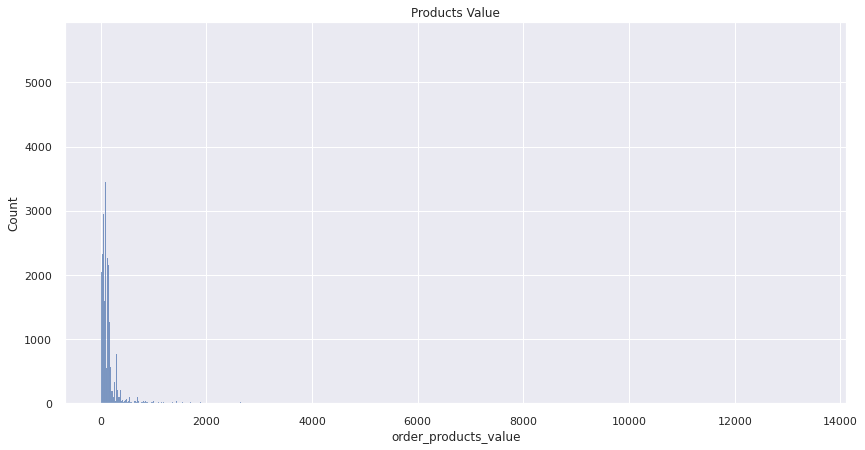

In [208]:
plt.figure(figsize=(14, 7))
plt.title('Products Value')
sns.histplot(x='order_products_value', data=data_merged_numerical)
plt.show()

As expected, order_products_value have a right skewed distribution based on the plot. Is it because customers tend to buy cheap product?

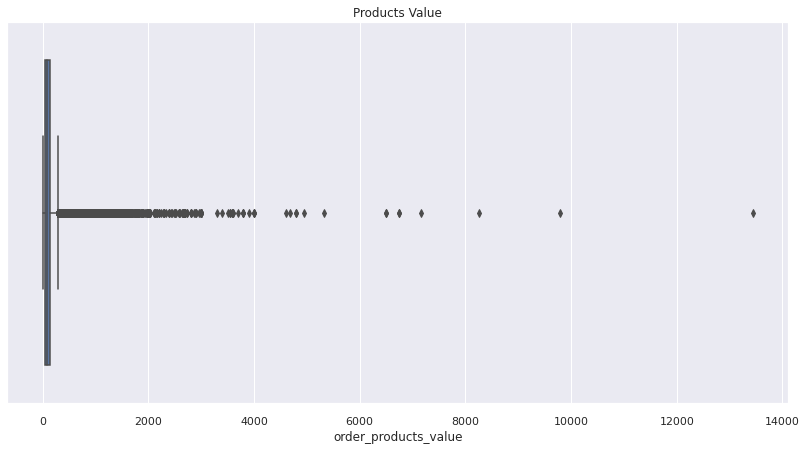

In [209]:
plt.figure(figsize=(14, 7))
plt.title('Products Value')
sns.boxplot(x='order_products_value', data=data_merged_numerical)
plt.show()

Freight Value

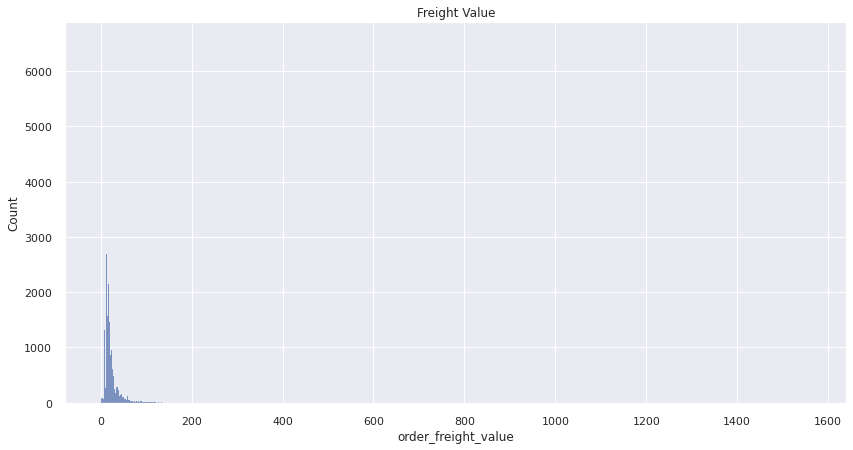

In [210]:
plt.figure(figsize=(14, 7))
plt.title('Freight Value')
sns.histplot(x='order_freight_value', data=data_merged_numerical)
plt.show()

The histogram of the freight value is similar with the order value and it has right skewed distribution too. Is it has some relation with order value? 

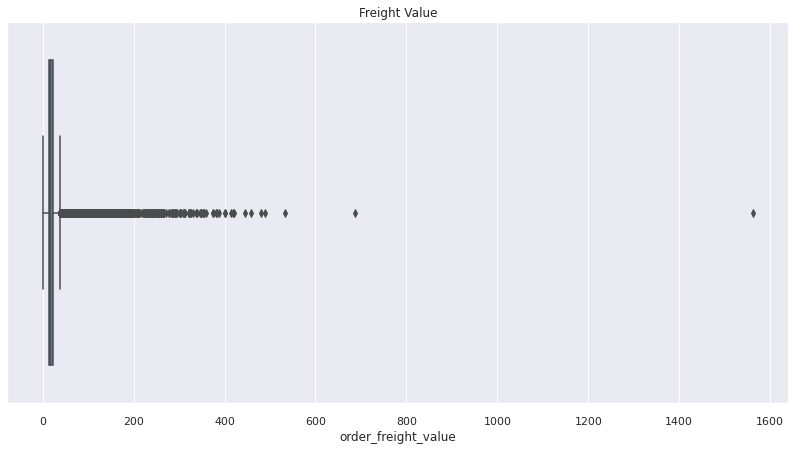

In [211]:
plt.figure(figsize=(14, 7))
plt.title('Freight Value')
sns.boxplot(x='order_freight_value', data=data_merged_numerical)
plt.show()

Product Name Length

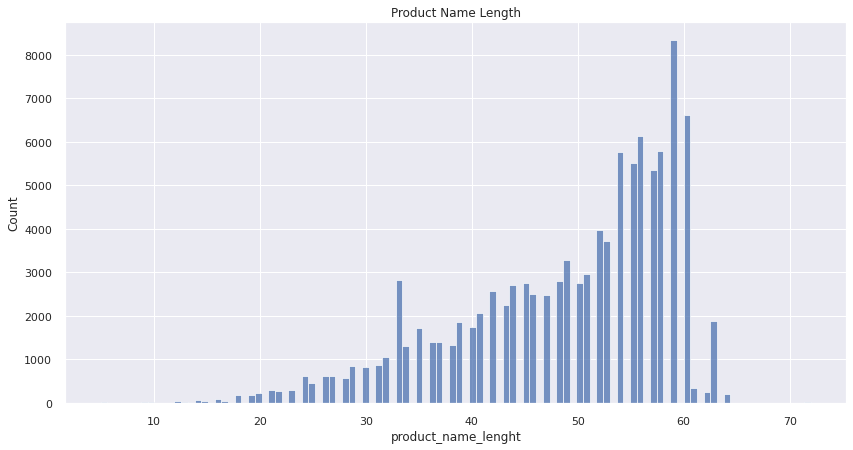

In [212]:
plt.figure(figsize=(14, 7))
plt.title('Product Name Length')
sns.histplot(x='product_name_lenght', data=data_merged_numerical)
plt.show()

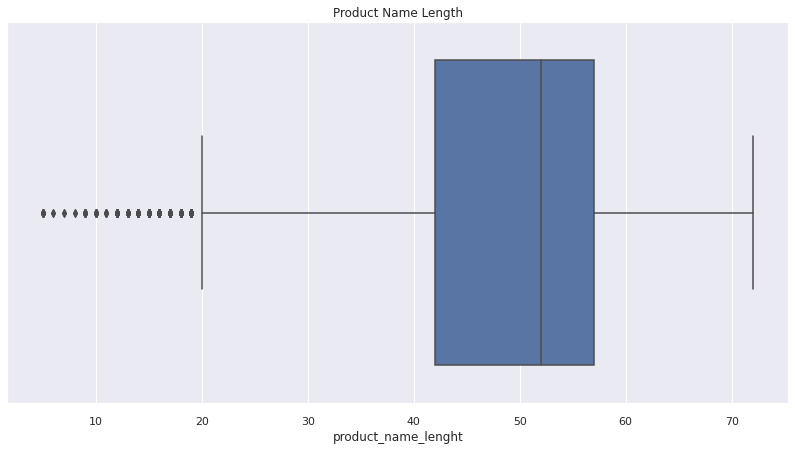

In [213]:
plt.figure(figsize=(14, 7))
plt.title('Product Name Length')
sns.boxplot(x='product_name_lenght', data=data_merged_numerical)
plt.show()

Product Description Length

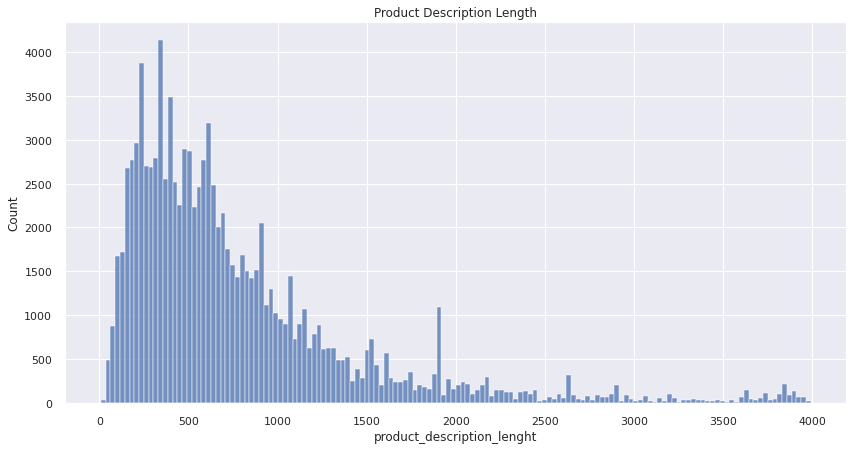

In [214]:
plt.figure(figsize=(14, 7))
plt.title('Product Description Length')
sns.histplot(x='product_description_lenght', data=data_merged_numerical)
plt.show()

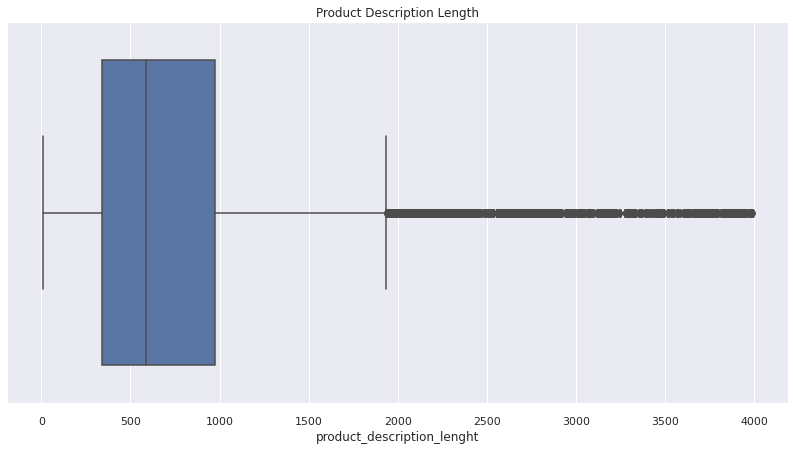

In [215]:
plt.figure(figsize=(14, 7))
plt.title('Product Description Length')
sns.boxplot(x='product_description_lenght', data=data_merged_numerical)
plt.show()

Payments Value

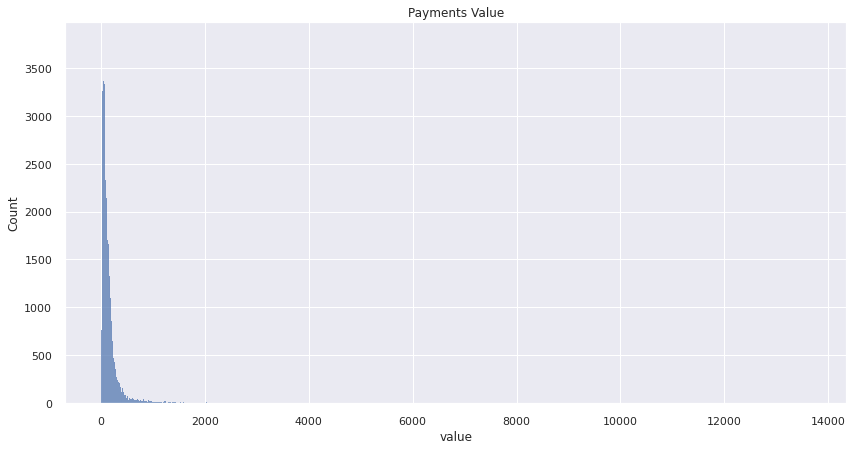

In [216]:
plt.figure(figsize=(14, 7))
plt.title('Payments Value')
sns.histplot(x='value', data=data_merged_numerical)
plt.show()

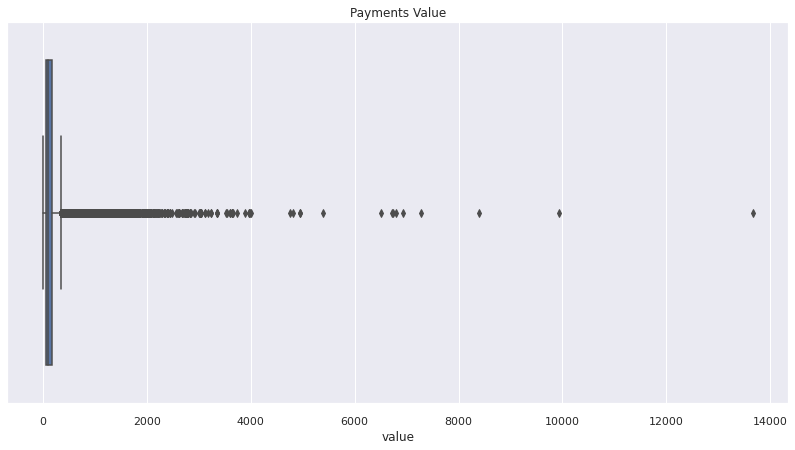

In [217]:
plt.figure(figsize=(14, 7))
plt.title('Payments Value')
sns.boxplot(x='value', data=data_merged_numerical)
plt.show()

Item Quantity

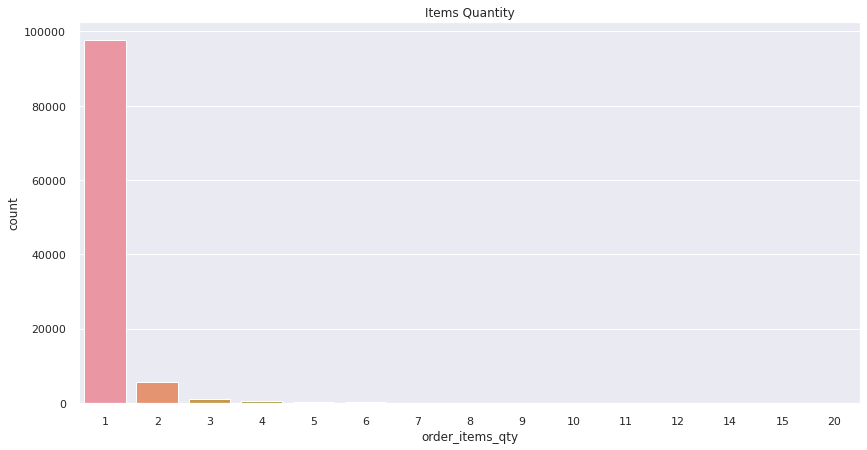

In [218]:
plt.figure(figsize=(14, 7))
plt.title('Items Quantity')
sns.countplot(x='order_items_qty', data=data_merged_numerical)
plt.show()

In [219]:
total = data_merged_numerical['order_items_qty'].value_counts().sort_values(ascending=False)
percent = (100 * data_merged_numerical['order_items_qty'].value_counts() / data_merged_numerical['order_items_qty'].count()).sort_values(ascending=False)
order_items_qty = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])
order_items_qty

,Total,Percent
1,97576,93.065133
2,5576,5.318226
3,936,0.892729
4,430,0.410121
5,158,0.150696
6,148,0.141158
7,4,0.003815
15,4,0.003815
20,4,0.003815
8,3,0.002861


**93% of the customers** tend to buy only 1 for each item.

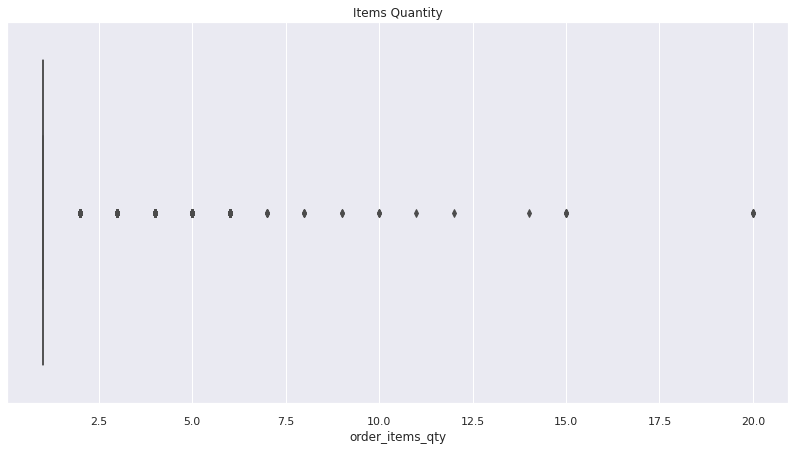

In [220]:
plt.figure(figsize=(14, 7))
plt.title('Items Quantity')
sns.boxplot(x='order_items_qty', data=data_merged_numerical)
plt.show()

Sellers Quantity

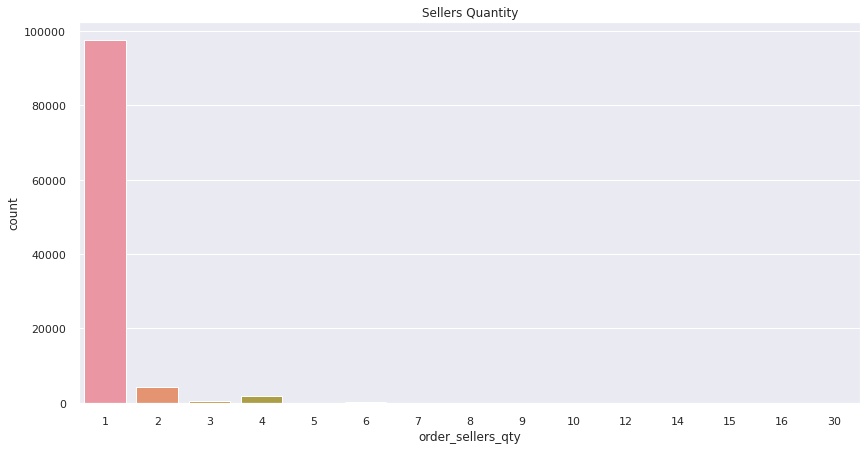

In [221]:
plt.figure(figsize=(14, 7))
plt.title('Sellers Quantity')
sns.countplot(x='order_sellers_qty', data=data_merged_numerical)
plt.show()

In [222]:
total = data_merged_numerical['order_sellers_qty'].value_counts().sort_values(ascending=False)
percent = (100 * data_merged_numerical['order_sellers_qty'].value_counts() / data_merged_numerical['order_sellers_qty'].count()).sort_values(ascending=False)
order_sellers_qty = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])
order_sellers_qty

,Total,Percent
1,97481,92.974525
2,4261,4.064017
4,1935,1.845546
3,609,0.580846
6,287,0.273732
8,78,0.074394
9,73,0.069625
12,42,0.040058
10,32,0.030521
5,18,0.017168


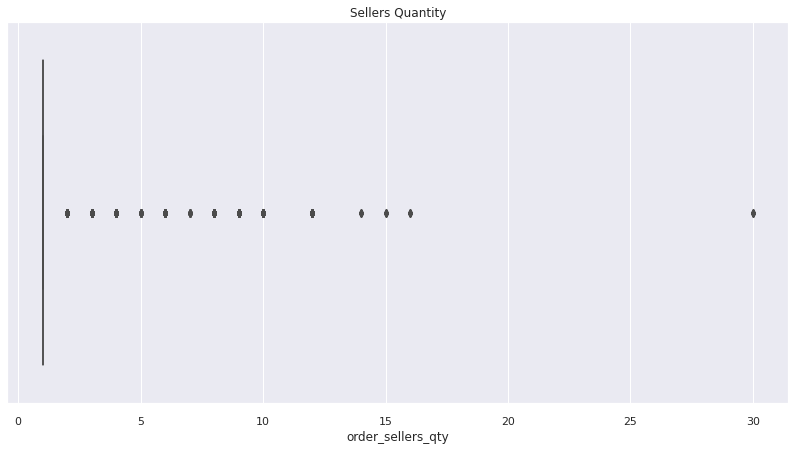

In [223]:
plt.figure(figsize=(14, 7))
plt.title('Sellers Quantity')
sns.boxplot(x='order_sellers_qty', data=data_merged_numerical)
plt.show()

Photos Quantity

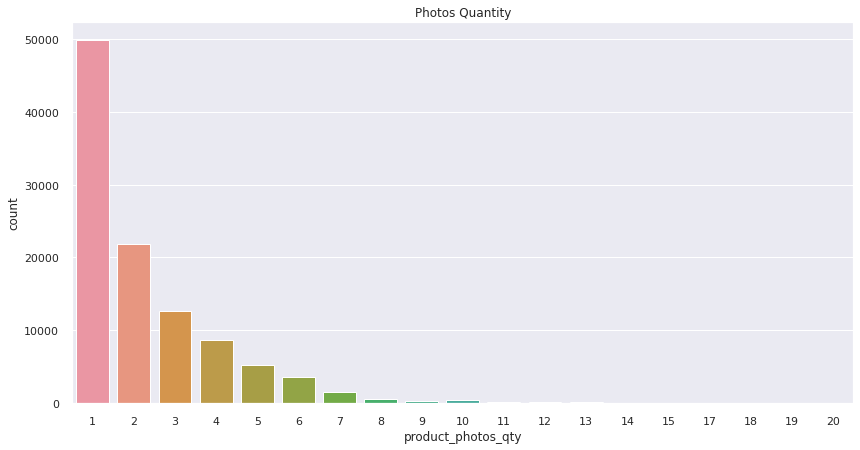

In [224]:
plt.figure(figsize=(14, 7))
plt.title('Photos Quantity')
sns.countplot(x='product_photos_qty', data=data_merged_numerical)
plt.show()

In [225]:
total = data_merged_numerical['product_photos_qty'].value_counts().sort_values(ascending=False)
percent = (100 * data_merged_numerical['product_photos_qty'].value_counts() / data_merged_numerical['product_photos_qty'].count()).sort_values(ascending=False)
product_photos_qty = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])
product_photos_qty

,Total,Percent
1,49860,47.555009
2,21871,20.859920
3,12622,12.038494
4,8652,8.252024
5,5262,5.018742
6,3557,3.392562
7,1530,1.459269
8,551,0.525528
10,358,0.341450
9,313,0.298530


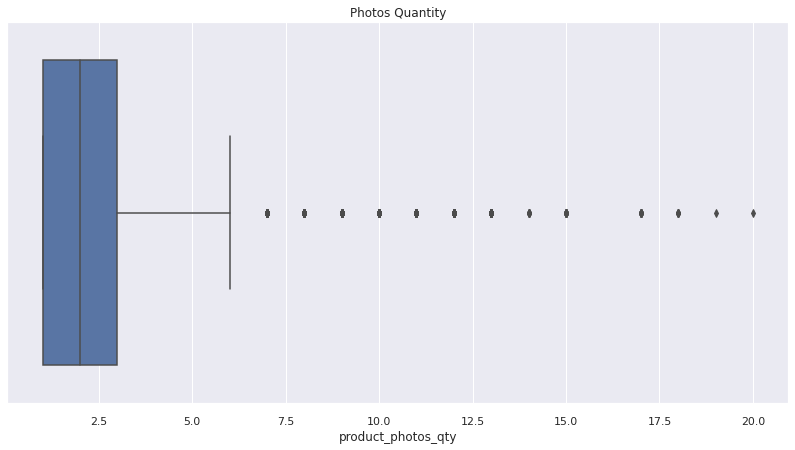

In [226]:
plt.figure(figsize=(14, 7))
plt.title('Photos Quantity')
sns.boxplot(x='product_photos_qty', data=data_merged_numerical)
plt.show()

Review Score

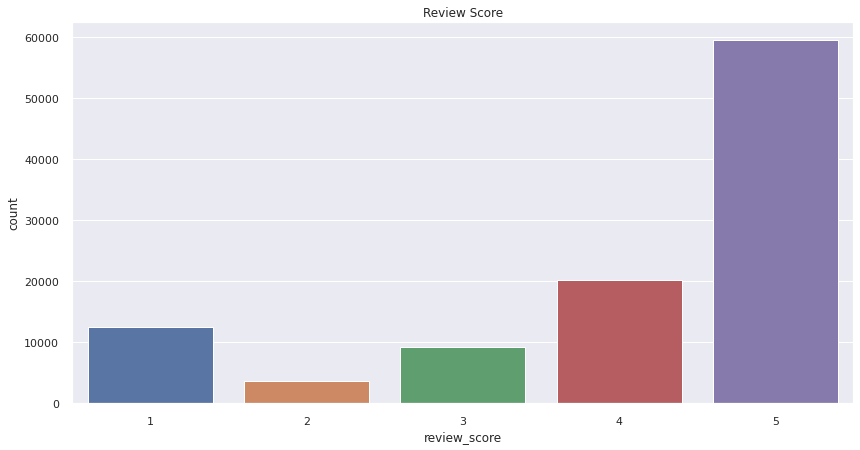

In [227]:
plt.figure(figsize=(14, 7))
plt.title('Review Score')
sns.countplot(x='review_score', data=data_merged_numerical)
plt.show()

In [228]:
total = data_merged_numerical['review_score'].value_counts().sort_values(ascending=False)
percent = (100 * data_merged_numerical['review_score'].value_counts() / data_merged_numerical['review_score'].count()).sort_values(ascending=False)
review_score = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])
review_score

,Total,Percent
5,59408,56.661612
4,20150,19.218480
1,12494,11.916412
3,9171,8.747031
2,3624,3.456465


**56.7% of the review** scored 5 that indicates high level of customer satisfaction, but how about the review that scored 1?

Installments

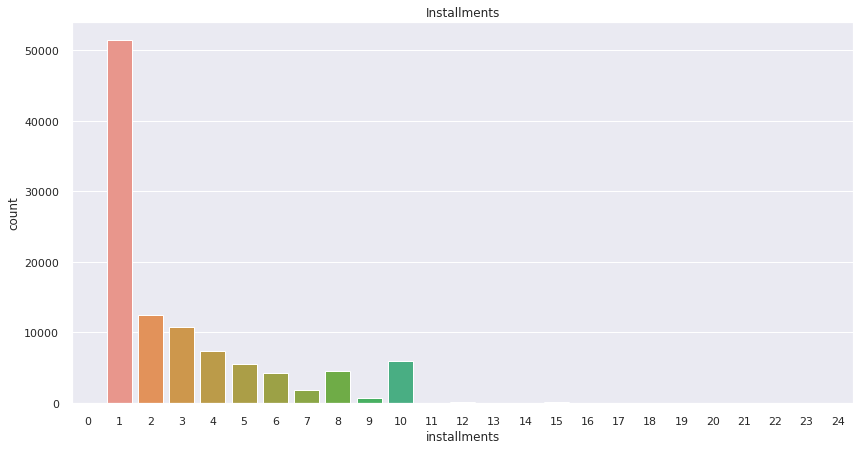

In [229]:
plt.figure(figsize=(14, 7))
plt.title('Installments')
sns.countplot(x='installments', data=data_merged_numerical)
plt.show()

The common installment for the payment is between **1** and **10**.  more than 10 installments is not common.

In [230]:
total = data_merged_numerical['installments'].value_counts().sort_values(ascending=False)
percent = (100 * data_merged_numerical['installments'].value_counts() / data_merged_numerical['installments'].count()).sort_values(ascending=False)
installments = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])
installments

,Total,Percent
1,51379,49.003786
2,12378,11.805774
3,10795,10.295955
4,7357,7.016891
10,5921,5.647277
5,5456,5.203773
8,4454,4.248095
6,4180,3.986762
7,1814,1.730140
9,720,0.686715


Sequential

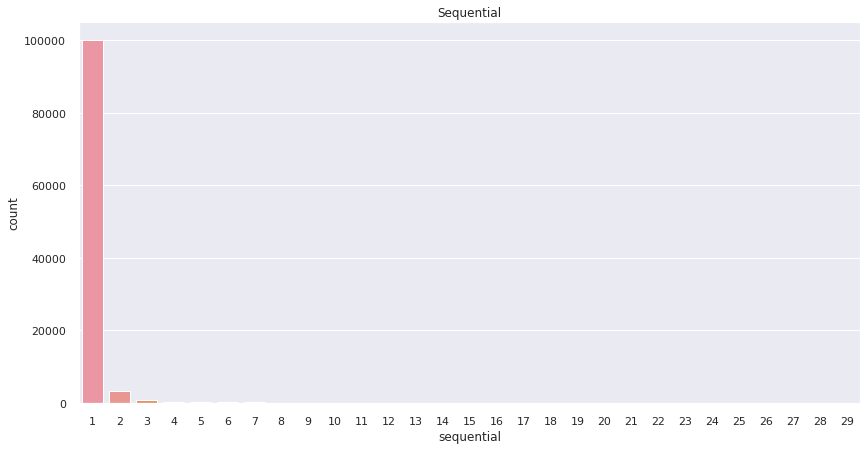

In [231]:
plt.figure(figsize=(14, 7))
plt.title('Sequential')
sns.countplot(x='sequential', data=data_merged_numerical)
plt.show()

In [232]:
total = data_merged_numerical['sequential'].value_counts().sort_values(ascending=False)
percent = (100 * data_merged_numerical['sequential'].value_counts() / data_merged_numerical['sequential'].count()).sort_values(ascending=False)
sequential = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])
sequential

,Total,Percent
1,99924,95.304587
2,3211,3.062558
3,647,0.617090
4,322,0.307114
5,196,0.186939
6,126,0.120175
7,89,0.084886
8,65,0.061995
9,56,0.053411
10,46,0.043873


Inferences
*   Customers tend to buy cheap product 
*   There is some relationship between order value and freight value
*   Customers tend to buy only 1 for each item
*   More than half of ther order have positive reviews
*   The common number of installments is between 1 and 10








**Categorical Data**

Next step, lets check categorical variable on the dataset.

In [233]:
data_merged_categorical = data_merged.select_dtypes(['category'])
data_merged_categorical.head()

,order_status,customer_city,customer_state,product_category_name_english,payment_type
0,delivered,guaratuba,pr,health_beauty,boleto
1,delivered,brasilia,df,health_beauty,credit_card
2,delivered,brasilia,df,health_beauty,credit_card
3,delivered,belo horizonte,mg,health_beauty,credit_card
4,delivered,cachoeiro de itapemirim,es,health_beauty,boleto


In [234]:
total = data_merged_categorical.isnull().sum().sort_values(ascending=False)
percent = (100 * data_merged_categorical.isnull().sum() / data_merged_categorical.isnull().count()).sort_values(ascending=False)
missing_data = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])
missing_data

,Total,Percent
payment_type,0,0.0
product_category_name_english,0,0.0
customer_state,0,0.0
customer_city,0,0.0
order_status,0,0.0


Order Status

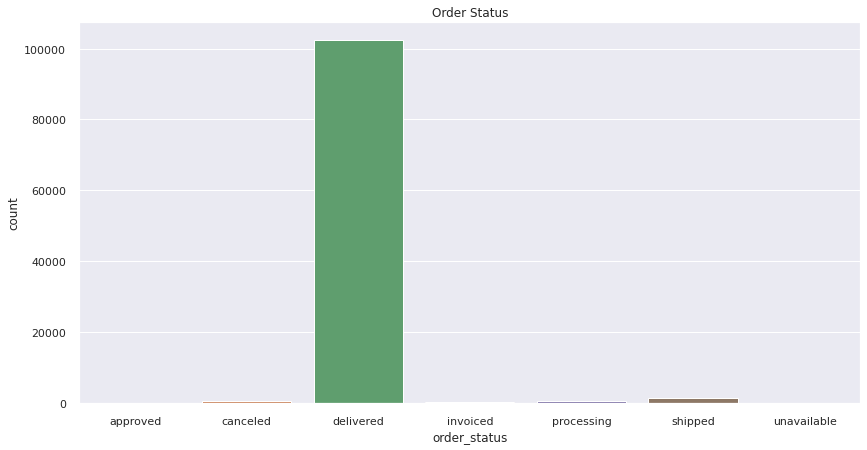

In [235]:
plt.figure(figsize=(14, 7))
plt.title('Order Status')
sns.countplot(x='order_status', data=data_merged_categorical)
plt.show()

From the order status variable, there are some data that **has not delivered yet**. this answer why there is some **missing value** on **delivered time** and **approved time** variable.

In [236]:
total = data_merged_categorical['order_status'].value_counts().sort_values(ascending=False)
percent = (100 * data_merged_categorical['order_status'].value_counts() / data_merged_categorical['order_status'].count()).sort_values(ascending=False)
order_status = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])
order_status

,Total,Percent
delivered,102318,97.587914
shipped,1256,1.197936
canceled,512,0.488331
processing,410,0.391046
invoiced,340,0.324282
unavailable,9,0.008584
approved,2,0.001908


City

In [237]:
total = data_merged_categorical['customer_city'].value_counts().sort_values(ascending=False)
percent = (100 * data_merged_categorical['customer_city'].value_counts() / data_merged_categorical['customer_city'].count()).sort_values(ascending=False)
customer_city = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])
customer_city

,Total,Percent
sao paulo,15985,15.246025
rio de janeiro,7539,7.190478
belo horizonte,2822,2.691541
brasilia,2109,2.011502
curitiba,1531,1.460223
...,...,...
tomazina,1,0.000954
narandiba,1,0.000954
anguera,1,0.000954
balbinos,1,0.000954


**Sao Paulo** has the most order from this data

State

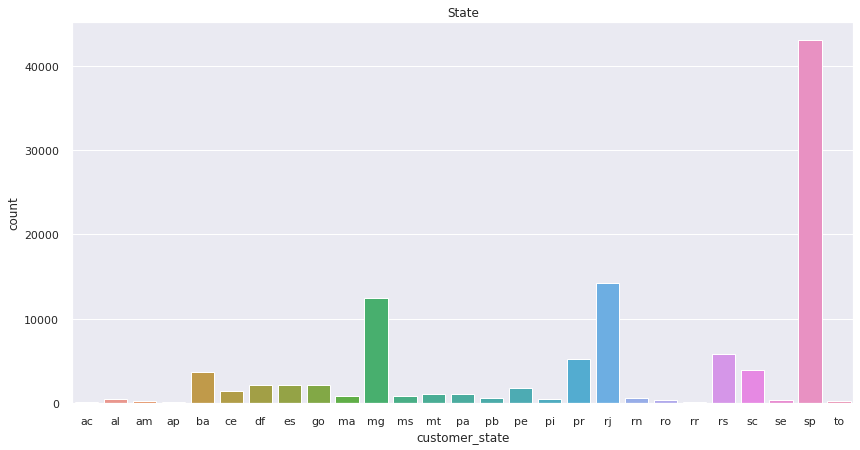

In [238]:
plt.figure(figsize=(14, 7))
plt.title('State')
sns.countplot(x='customer_state', data=data_merged_categorical)
plt.show()

In [239]:
total = data_merged_categorical['customer_state'].value_counts().sort_values(ascending=False)
percent = (100 * data_merged_categorical['customer_state'].value_counts() / data_merged_categorical['customer_state'].count()).sort_values(ascending=False)
customer_state = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])
customer_state

,Total,Percent
sp,43055,41.064599
rj,14254,13.595048
mg,12443,11.867769
rs,5842,5.571929
pr,5240,4.997759
sc,3885,3.705399
ba,3664,3.494616
es,2132,2.033439
df,2121,2.022948
go,2101,2.003872


Product Category

In [240]:
total = data_merged_categorical['product_category_name_english'].value_counts().sort_values(ascending=False)
percent = (100 * data_merged_categorical['product_category_name_english'].value_counts() / data_merged_categorical['product_category_name_english'].count()).sort_values(ascending=False)
product_category_name_english = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])
product_category_name_english

,Total,Percent
bed_bath_table,11169,10.652665
health_beauty,8210,7.830458
furniture_decor,8184,7.805660
sports_leisure,8158,7.780862
watches_gifts,7367,7.026429
...,...,...
costruction_tools_tools,11,0.010491
arts_and_craftmanship,10,0.009538
flowers,10,0.009538
cine_photo,8,0.007630


**Bed bath table** is product that has most orders

Payment Type

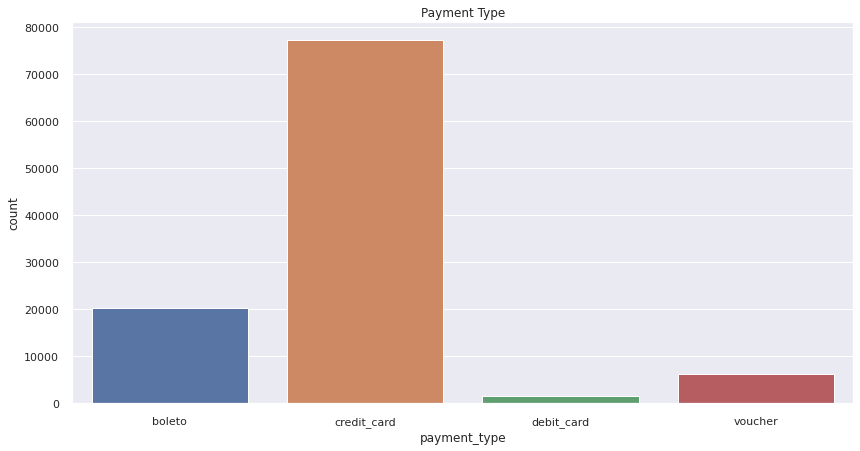

In [241]:
plt.figure(figsize=(14, 7))
plt.title('Payment Type')
sns.countplot(x='payment_type', data=data_merged_categorical)
plt.show()

**Credit card** is the most commmon payment type from the data

In [242]:
total = data_merged_categorical['payment_type'].value_counts().sort_values(ascending=False)
percent = (100 * data_merged_categorical['payment_type'].value_counts() / data_merged_categorical['payment_type'].count()).sort_values(ascending=False)
payment_type = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])
payment_type

,Total,Percent
credit_card,77208,73.638731
boleto,20163,19.230879
voucher,6110,5.827539
debit_card,1366,1.302851


Inferences
*   Sao Paulo has the most order 
*   Bed bath table is the item with most order
*   Credit card isthe most common payment type 





**Time Series Data**

Lastly for the univariate anlysis, lets take a look at time series data including datetime

In [243]:
data_merged_time_series = data_merged.select_dtypes('datetime64[ns]')
data_merged_time_series.head()

,order_purchase_timestamp,order_aproved_at,order_estimated_delivery_date,order_delivered_customer_date
0,2017-01-31 17:19:01,2017-02-01 02:41:21.549551,2017-03-15,2017-02-06 11:04:24.154259
1,2018-04-17 13:25:36,2018-04-18 13:31:35.349522,2018-05-10,2018-04-27 20:56:32.787589
2,2018-04-17 13:25:36,2018-04-18 13:31:35.349522,2018-05-10,2018-04-27 20:56:32.787589
3,2018-02-18 12:41:01,2018-02-18 13:46:36.606696,2018-03-14,2018-03-03 02:48:53.603256
4,2018-05-09 23:33:28,2018-05-11 02:57:52.916830,2018-05-24,2018-05-17 22:31:58.137648


In [244]:
# Check NULL Value
total = data_merged_time_series.isnull().sum().sort_values(ascending=False)
percent = (100 * data_merged_time_series.isnull().sum() / data_merged_time_series.isnull().count()).sort_values(ascending=False)
missing_data = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])
missing_data

,Total,Percent
order_delivered_customer_date,2525,2.408271
order_aproved_at,18,0.017168
order_estimated_delivery_date,0,0.000000
order_purchase_timestamp,0,0.000000


Purchase Timestamp

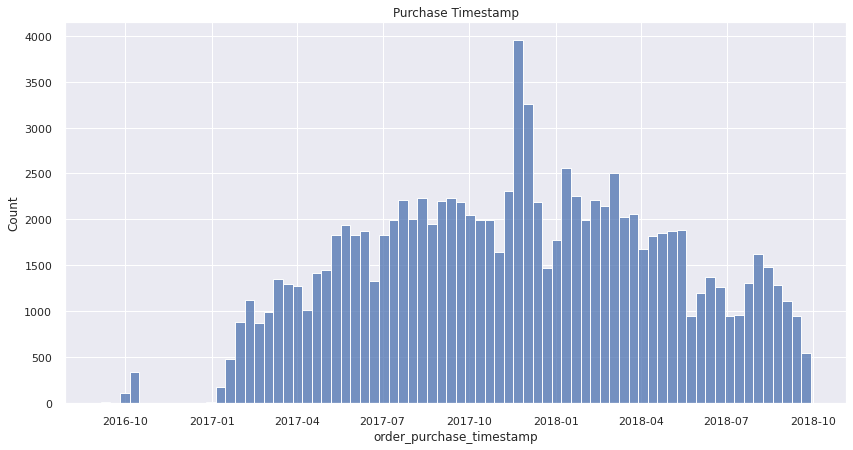

In [245]:
plt.figure(figsize=(14, 7))
plt.title('Purchase Timestamp')
sns.histplot(x='order_purchase_timestamp', data=data_merged_time_series)
plt.show()

From the plot, there is a huge increase in sales between **October 2017** and **January 2018**and I suspect it was happened in **November 2017**

Approved At

In [246]:
data_merged[data_merged['order_aproved_at'].isnull()]['order_status'].value_counts()

delivered      17
canceled        1
unavailable     0
shipped         0
processing      0
invoiced        0
approved        0
Name: order_status, dtype: int64

Delivered Date

In [247]:
data_merged[data_merged['order_delivered_customer_date'].isnull()]['order_status'].value_counts()

shipped        1256
canceled        503
processing      410
invoiced        340
unavailable       9
delivered         5
approved          2
Name: order_status, dtype: int64

To answer the question about missing data on delivered ate and approved date, lets check each corresponding variables. On approved at variable there is some missing value with order status delivered and canceled. on delivered date variable, there are missing values for each category in order status but there is only small missing value on delivered product.

# **Multivariate Analysis**

For this step, I need to create some new variable to help on multivariate analysis. Here are some new variables,
*   value_spent: total amount spent for an order (order_value * item_quantity + freigh_value)
*   day_purchase: day of pruchase date
*   month_purchase: month of purchase date
*   year_purchase: year of purchase date
*   day_of_week_purchase: day of week of purchase date(Monday - Sunday)
*   hour_purchase: hour of purchase date
*   approved_time: time needed to approve order (in hours)
*   delivery_time: time needed to deliver order (in days)
*   estimated_delivery_time: estimation time for deliver the order (in days)
*   lead_time: time needed to finish the order (in days)
*   delivered_time_difference: differences between actual and estimated delivery time (in days)
*   late_flag: flag that indicates late delivery (1 if late)







In [248]:
data_merged_new = data_merged.copy()

data_merged_new['day_purchase'] = data_merged_new['order_purchase_timestamp'].dt.day
data_merged_new['month_purchase'] = data_merged_new['order_purchase_timestamp'].dt.month
data_merged_new['year_purchase'] = data_merged_new['order_purchase_timestamp'].dt.year
data_merged_new['day_of_week_purchase'] = pd.Categorical(data_merged_new['order_purchase_timestamp'].dt.day_name(), categories=['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday'], ordered=True)
data_merged_new['hour_purchase'] = data_merged_new['order_purchase_timestamp'].dt.hour
data_merged_new['value_spent'] = data_merged_new['order_products_value'] * data_merged_new['order_items_qty'] + data_merged_new['order_freight_value']
data_merged_new['approved_time'] = (data_merged_new['order_aproved_at'] - data_merged_new['order_purchase_timestamp']).astype('timedelta64[h]')
data_merged_new['estimated_delivery_time'] = (data_merged_new['order_estimated_delivery_date'] - data_merged_new['order_aproved_at']).dt.days
data_merged_new['delivery_time'] = (data_merged_new['order_delivered_customer_date'] - data_merged_new['order_aproved_at']).dt.days
data_merged_new['lead_time'] = (data_merged_new['order_delivered_customer_date'] - data_merged_new['order_purchase_timestamp']).dt.days
data_merged_new['delivered_time_difference'] = (data_merged_new['order_delivered_customer_date'] - data_merged_new['order_estimated_delivery_date']).dt.days
data_merged_new.loc[(data_merged_new['delivered_time_difference'] > 0), 'late_flag'] = 1
data_merged_new.loc[(data_merged_new['delivered_time_difference'] <= 0), 'late_flag'] = 0

data_merged_new.head()

,order_id,order_status,order_products_value,order_freight_value,order_items_qty,order_sellers_qty,order_purchase_timestamp,order_aproved_at,order_estimated_delivery_date,order_delivered_customer_date,customer_id,customer_city,customer_state,product_name_lenght,product_description_lenght,product_photos_qty,review_score,customer_unique_id,product_category_name_english,installments,sequential,payment_type,value,day_purchase,month_purchase,year_purchase,day_of_week_purchase,hour_purchase,value_spent,approved_time,estimated_delivery_time,delivery_time,lead_time,delivered_time_difference,late_flag
0,b95df3cef5297e79ef709ba256518f6f,delivered,349.90,13.84,1,1,2017-01-31 17:19:01,2017-02-01 02:41:21.549551,2017-03-15,2017-02-06 11:04:24.154259,297dcf281305aabfee256d313076af2b,guaratuba,pr,51,625,1,5,a27e24da3a7dc34713304a30896a3c4e,health_beauty,1,1,boleto,363.74,31,1,2017,Tuesday,17,363.74,9.0,41.0,5.0,5.0,-37.0,0.0
1,e98077a0d199a25a40eab3b14cc230d4,delivered,39.99,15.23,1,2,2018-04-17 13:25:36,2018-04-18 13:31:35.349522,2018-05-10,2018-04-27 20:56:32.787589,5161d5feec98ade754f67746caf8e0c9,brasilia,df,51,405,2,5,c96f477f96ccbb7cb476a48ea6840098,health_beauty,7,1,credit_card,110.44,17,4,2018,Tuesday,13,55.22,24.0,21.0,9.0,10.0,-13.0,0.0
2,e98077a0d199a25a40eab3b14cc230d4,delivered,39.99,15.23,1,2,2018-04-17 13:25:36,2018-04-18 13:31:35.349522,2018-05-10,2018-04-27 20:56:32.787589,5161d5feec98ade754f67746caf8e0c9,brasilia,df,47,405,2,5,c96f477f96ccbb7cb476a48ea6840098,health_beauty,7,1,credit_card,110.44,17,4,2018,Tuesday,13,55.22,24.0,21.0,9.0,10.0,-13.0,0.0
3,8a723730400b508cbf47fbef4a76ec8e,delivered,60.00,20.91,1,1,2018-02-18 12:41:01,2018-02-18 13:46:36.606696,2018-03-14,2018-03-03 02:48:53.603256,f19376e0c54da9409485f7ef9556d367,belo horizonte,mg,38,1665,1,5,04533db2963aa82a202f214aeff155a6,health_beauty,1,1,credit_card,80.91,18,2,2018,Sunday,12,80.91,1.0,23.0,12.0,12.0,-11.0,0.0
4,cf71b9b6b7ed12d72f541b0420023f19,delivered,79.99,10.94,1,1,2018-05-09 23:33:28,2018-05-11 02:57:52.916830,2018-05-24,2018-05-17 22:31:58.137648,12698ad9da6b62003811594de0ae297e,cachoeiro de itapemirim,es,59,492,3,4,0e37bd1acb9088c21332942d2a334cf7,health_beauty,1,1,boleto,90.93,9,5,2018,Wednesday,23,90.93,27.0,12.0,6.0,7.0,-7.0,0.0


Before dive deeper into the bivariate analysis, first lets take a look at the correlation between variables first.

In [249]:
data_correlation = data_merged_new.drop(columns=['order_id', 'order_purchase_timestamp', 'order_aproved_at','order_estimated_delivery_date',
                                                 'order_delivered_customer_date', 'customer_id', 'customer_unique_id'])
data_correlation.head()

,order_status,order_products_value,order_freight_value,order_items_qty,order_sellers_qty,customer_city,customer_state,product_name_lenght,product_description_lenght,product_photos_qty,review_score,product_category_name_english,installments,sequential,payment_type,value,day_purchase,month_purchase,year_purchase,day_of_week_purchase,hour_purchase,value_spent,approved_time,estimated_delivery_time,delivery_time,lead_time,delivered_time_difference,late_flag
0,delivered,349.90,13.84,1,1,guaratuba,pr,51,625,1,5,health_beauty,1,1,boleto,363.74,31,1,2017,Tuesday,17,363.74,9.0,41.0,5.0,5.0,-37.0,0.0
1,delivered,39.99,15.23,1,2,brasilia,df,51,405,2,5,health_beauty,7,1,credit_card,110.44,17,4,2018,Tuesday,13,55.22,24.0,21.0,9.0,10.0,-13.0,0.0
2,delivered,39.99,15.23,1,2,brasilia,df,47,405,2,5,health_beauty,7,1,credit_card,110.44,17,4,2018,Tuesday,13,55.22,24.0,21.0,9.0,10.0,-13.0,0.0
3,delivered,60.00,20.91,1,1,belo horizonte,mg,38,1665,1,5,health_beauty,1,1,credit_card,80.91,18,2,2018,Sunday,12,80.91,1.0,23.0,12.0,12.0,-11.0,0.0
4,delivered,79.99,10.94,1,1,cachoeiro de itapemirim,es,59,492,3,4,health_beauty,1,1,boleto,90.93,9,5,2018,Wednesday,23,90.93,27.0,12.0,6.0,7.0,-7.0,0.0


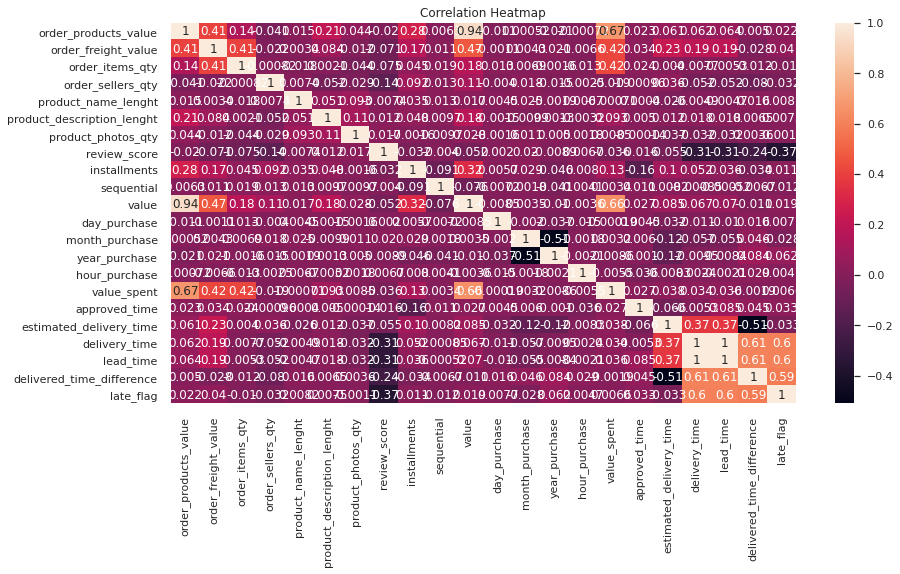

In [250]:
plt.figure(figsize=(14, 7))
plt.title('Correlation Heatmap')
sns.heatmap(data_correlation.corr(), annot=True)
plt.show()

About the correlation map, what interest me is,
*   relationship between product value and freight value
*   relationship between product value and product description length
*   relationship between freight value and item quantity
*   relationship between delivery time / lead_time and review score
*   relationship between delivered time difference and review score
*   relationship between late flag and review score



After looking at the correlation map, there are some questions to answer such as,
1.   How is the purchase pattern over time?
2.   Is customer satisfaction related to delivery performance?
4.   Is there any payment trend?

The bivariate analysis will be seperated into 4 section to answer the questions,
*   Purchase Pattern
*   Review Trends
*   Delivery Performance
*   Payment Trends





**Purchase Pattern**

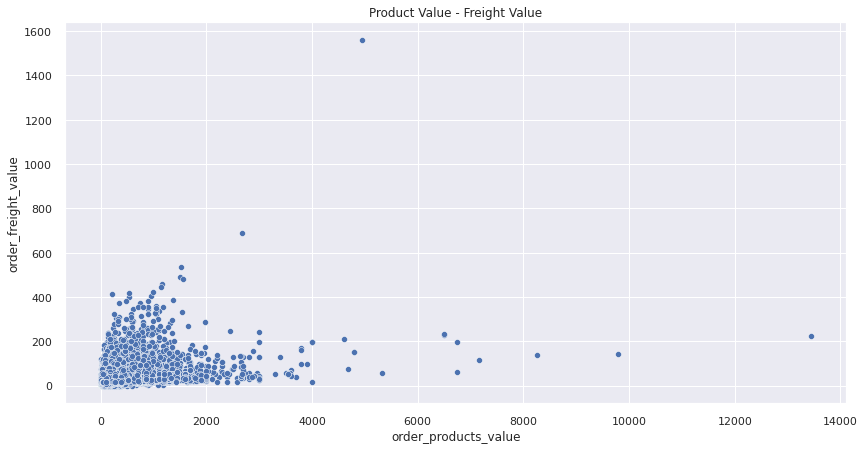

In [251]:
plt.figure(figsize=(14, 7))
plt.title('Product Value - Freight Value')
sns.scatterplot(data=data_merged_new, x="order_products_value", y="order_freight_value")
plt.show()

From the scatter lot, order value and freight value does not seem very correlated 

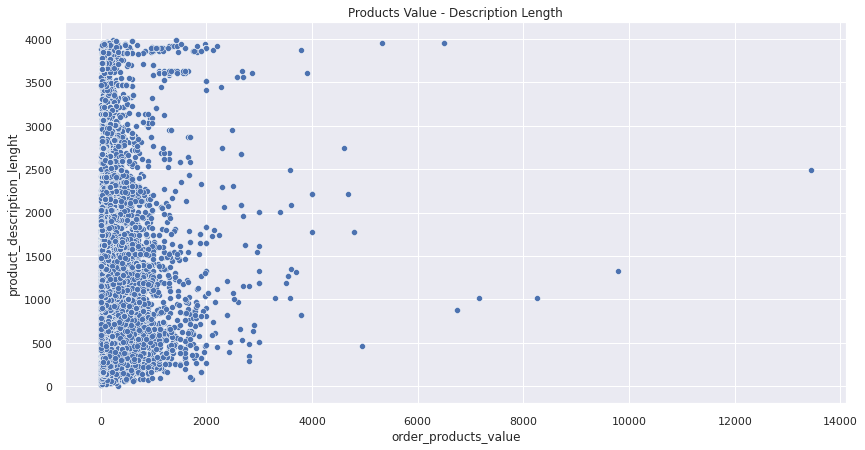

In [252]:
plt.figure(figsize=(14, 7))
plt.title('Products Value - Description Length')
sns.scatterplot(data=data_merged_new, x="order_products_value", y="product_description_lenght")
plt.show()

Order Value and product description length does not seem correlated either.

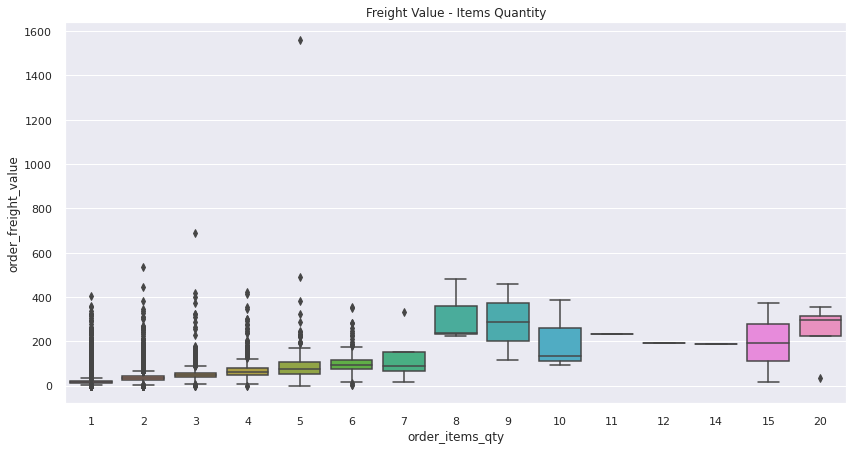

In [253]:
plt.figure(figsize=(14, 7))
plt.title('Freight Value - Items Quantity')
sns.boxplot(data=data_merged_new, x="order_items_qty", y="order_freight_value")
plt.show()

From the box plot, there is indication of correlated variable. **The higher the items quantity, the higher ther freight value**

Now lets take a look at purchasing pattern over time

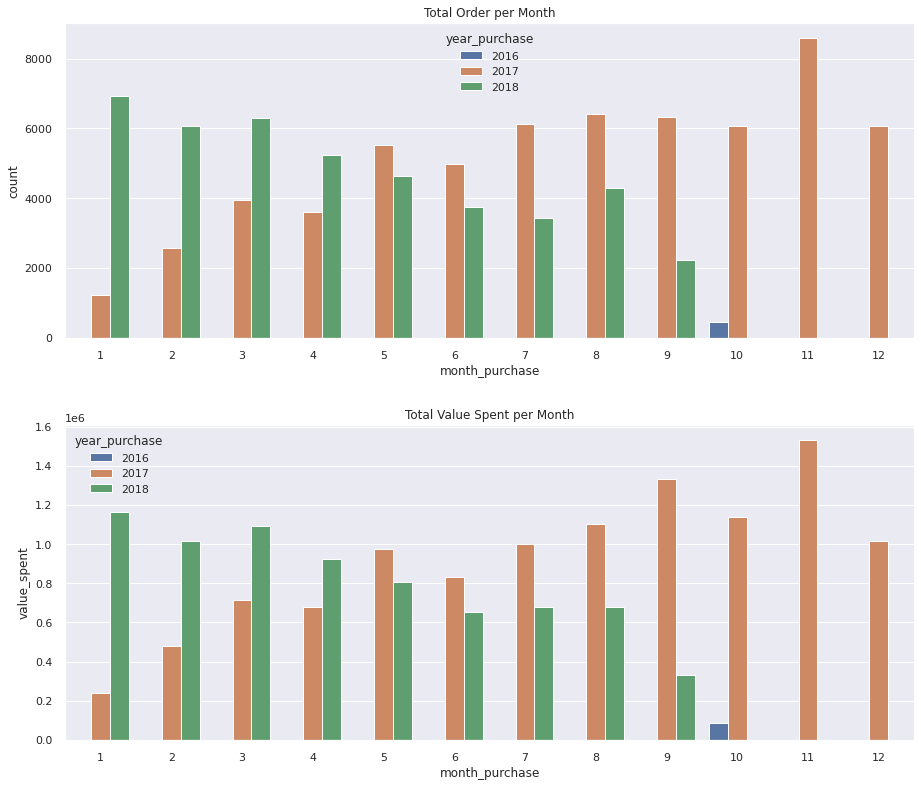

In [254]:
grouped_data = data_merged_new.groupby(['month_purchase', 'year_purchase'], as_index=False)['value_spent'].sum()

fig, ax = plt.subplots(2, 1, figsize=(14, 12))
fig.tight_layout(pad=5.0)
ax[0].set_title('Total Order per Month')
sns.countplot(x='month_purchase', hue='year_purchase', data=data_merged_new, ax=ax[0])

ax[1].set_title('Total Value Spent per Month')
sns.barplot(x='month_purchase', y='value_spent', hue='year_purchase', data=grouped_data, ax=ax[1])
plt.show()

From the plot, there is **uptrend pattern from the total order for every month in 2017**, but having **downtrend in 2018**. the trend is similar with the total value spent.

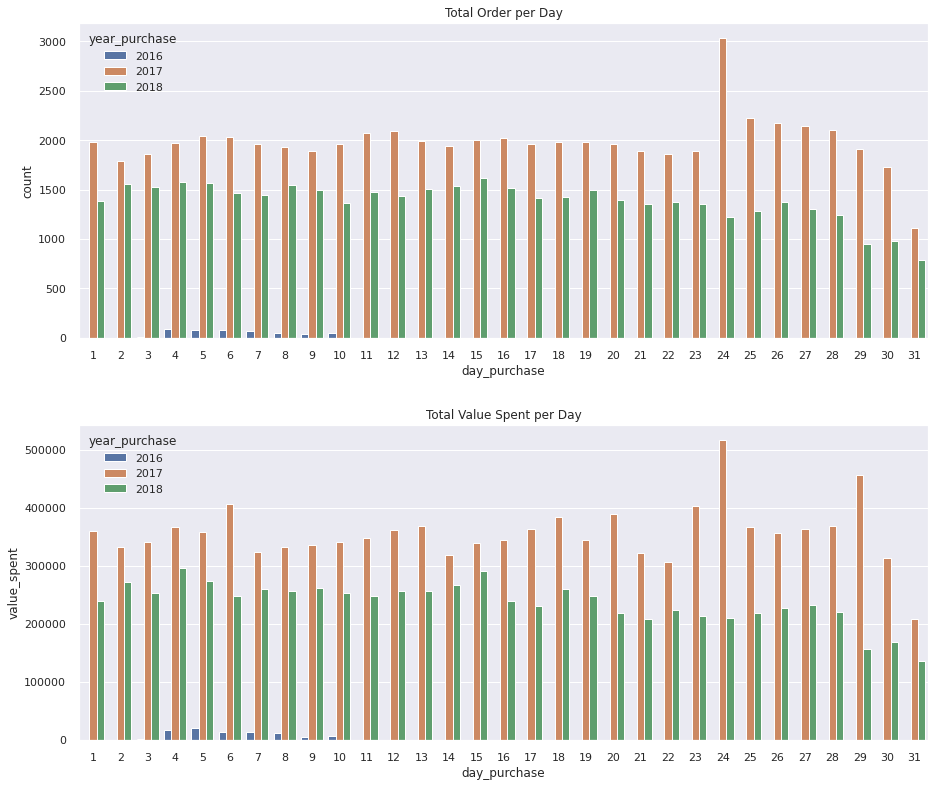

In [255]:
grouped_data = data_merged_new.groupby(['day_purchase', 'year_purchase'], as_index=False)['value_spent'].sum()

fig, ax = plt.subplots(2, 1, figsize=(14, 12))
fig.tight_layout(pad=5.0)
ax[0].set_title('Total Order per Day')
sns.countplot(x='day_purchase', hue='year_purchase', data=data_merged_new, ax=ax[0])

ax[1].set_title('Total Value Spent per Day')
sns.barplot(x='day_purchase', y='value_spent', hue='year_purchase', data=grouped_data, ax=ax[1])
plt.show()

There is huge increase of total order and total value spent on **24th**. This increase probably because of christmas sale

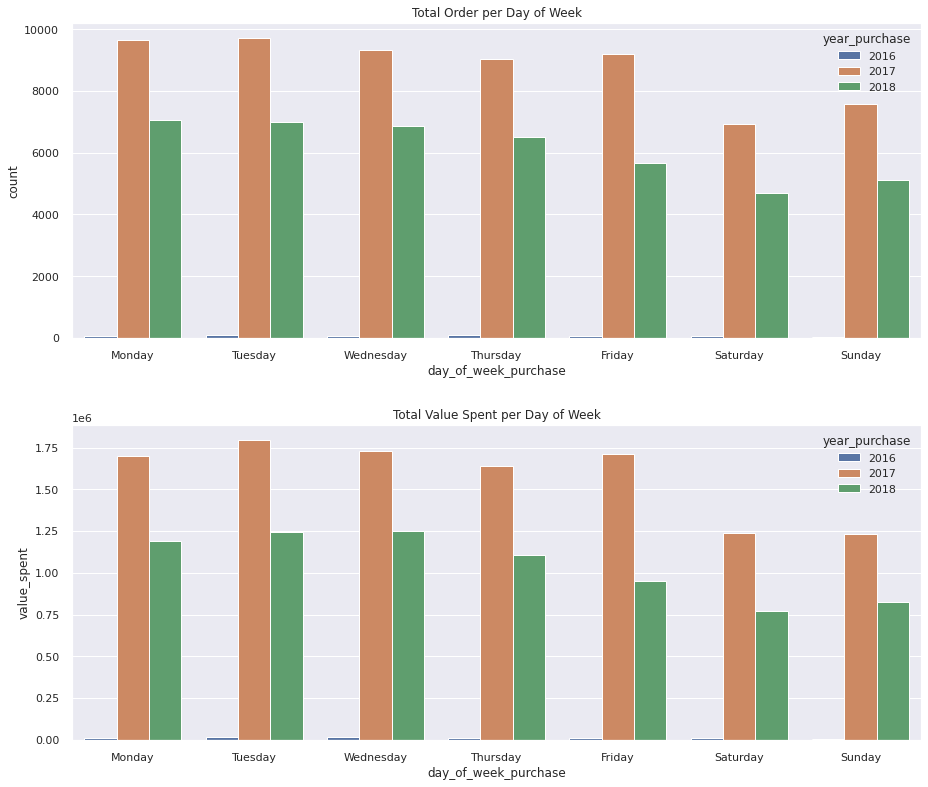

In [256]:
grouped_data = data_merged_new.groupby(['day_of_week_purchase', 'year_purchase'], as_index=False)['value_spent'].sum()

fig, ax = plt.subplots(2, 1, figsize=(14, 12))
fig.tight_layout(pad=5.0)
ax[0].set_title('Total Order per Day of Week')
sns.countplot(x='day_of_week_purchase', hue='year_purchase', data=data_merged_new, ax=ax[0])

ax[1].set_title('Total Value Spent per Day of Week')
sns.barplot(x='day_of_week_purchase', y='value_spent', hue='year_purchase', data=grouped_data, ax=ax[1])
plt.show()

Customers tend to shop online at the **beginning of weekday**

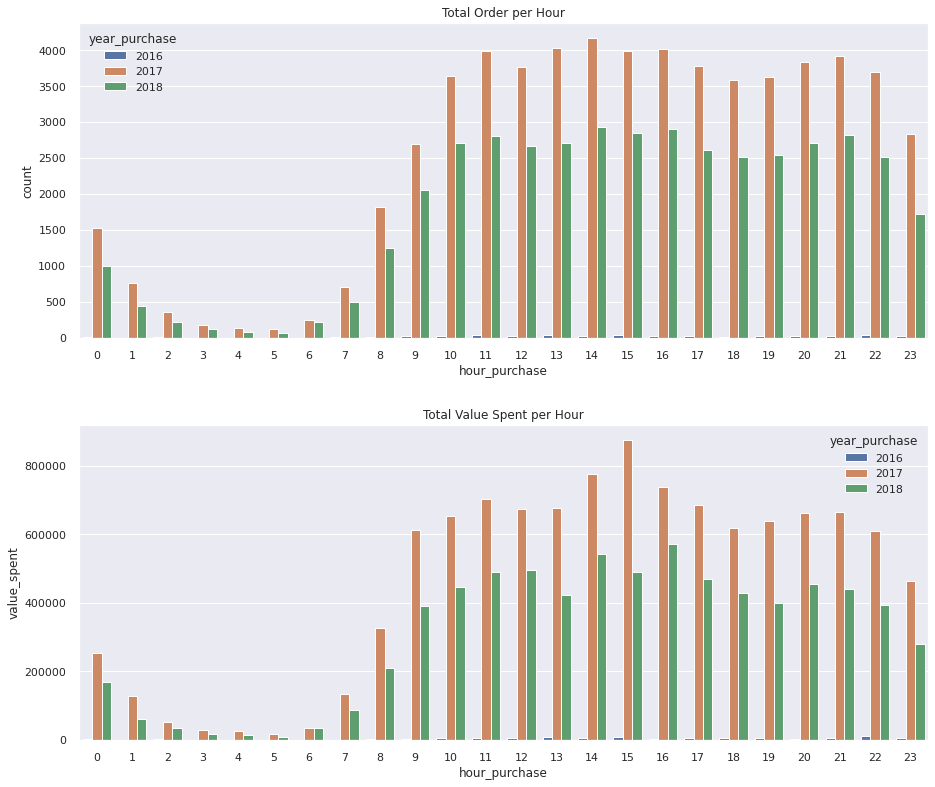

In [257]:
grouped_data = data_merged_new.groupby(['hour_purchase', 'year_purchase'], as_index=False)['value_spent'].sum()

fig, ax = plt.subplots(2, 1, figsize=(14, 12))
fig.tight_layout(pad=5.0)
ax[0].set_title('Total Order per Hour')
sns.countplot(x='hour_purchase', hue='year_purchase', data=data_merged_new, ax=ax[0])

ax[1].set_title('Total Value Spent per Hour')
sns.barplot(x='hour_purchase', y='value_spent', hue='year_purchase', data=grouped_data, ax=ax[1])
plt.show()

Customers tend to shop online on the **afternoon between 11am to 3pm**

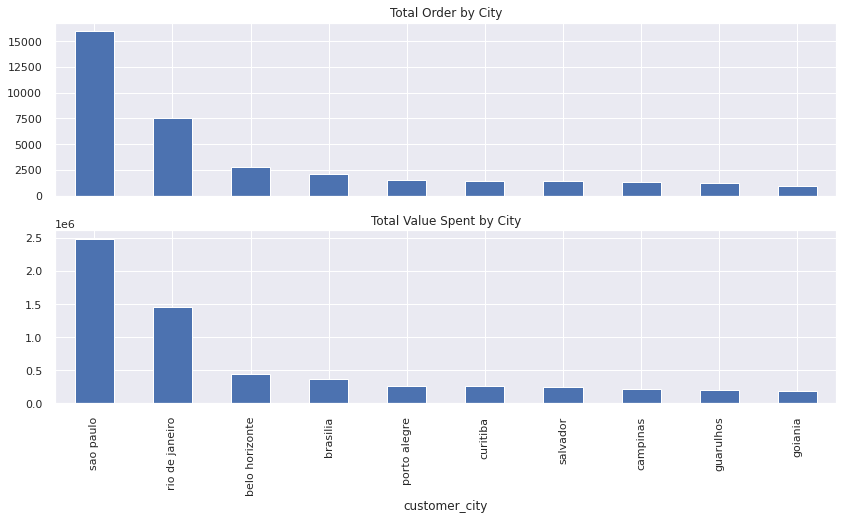

In [258]:
fig, ax = plt.subplots(2, 1, figsize=(14, 7))

(data_merged_new.groupby('customer_city')['order_id'].count().sort_values(ascending=False).head(10)).plot(kind='bar', title='Total Order by City', ax=ax[0])
(data_merged_new.groupby('customer_city')['value_spent'].sum().sort_values(ascending=False).head(10)).plot(kind='bar', title='Total Value Spent by City', ax=ax[1], sharex=True)
plt.show()

The top 3 city with highest total order and total value spent are **sao paulo, rio de janeiro, and belo horizonte** respectively

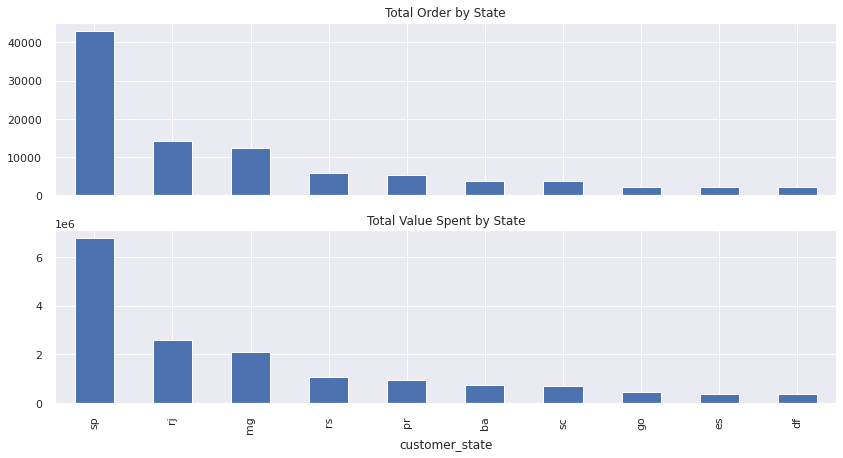

In [259]:
fig, ax = plt.subplots(2, 1, figsize=(14, 7))

(data_merged_new.groupby('customer_state')['order_id'].count().sort_values(ascending=False).head(10)).plot(kind='bar', title='Total Order by State', ax=ax[0])
(data_merged_new.groupby('customer_state')['value_spent'].sum().sort_values(ascending=False).head(10)).plot(kind='bar', title='Total Value Spent by State', ax=ax[1], sharex=True)
plt.show()

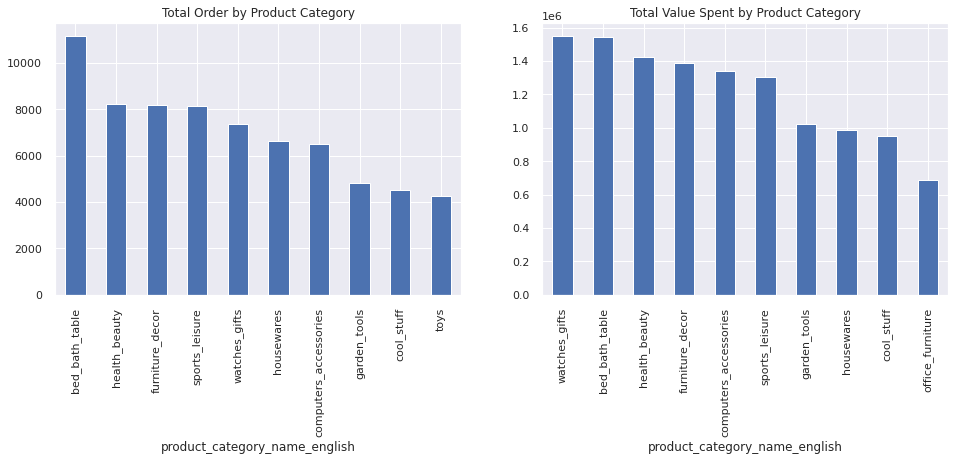

In [260]:
fig, ax = plt.subplots(1, 2, figsize=(16, 5))

(data_merged_new.groupby('product_category_name_english')['order_id'].count().sort_values(ascending=False).head(10)).plot(kind='bar', title='Total Order by Product Category', ax=ax[0])
(data_merged_new.groupby('product_category_name_english')['value_spent'].sum().sort_values(ascending=False).head(10)).plot(kind='bar', title='Total Value Spent by Product Category', ax=ax[1])
plt.show()

Top 3 product categories with highest **total order** are **bed bath table, health beauty, and furniture decor** respectively. Top 3 product categories with highest **total value** spent are **watches gifts, bed bath table, and health beauty** respectively.

**Review Pattern**

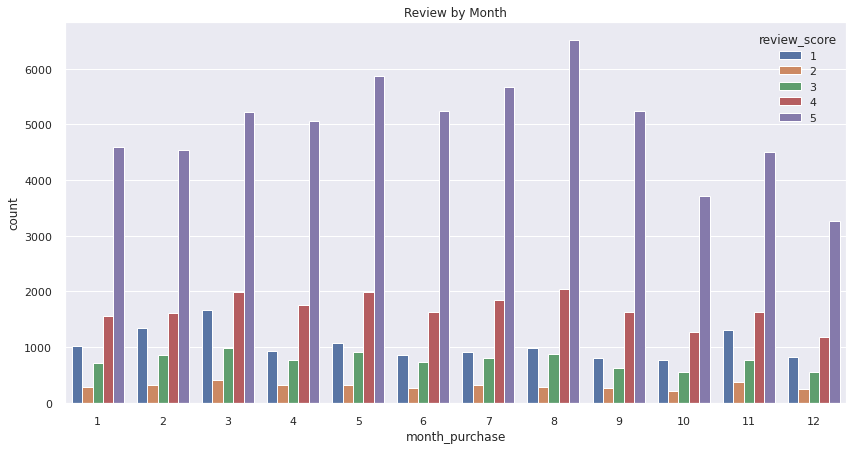

In [261]:
plt.figure(figsize=(14, 7))
plt.title('Review by Month')
sns.countplot(x='month_purchase', hue='review_score', data=data_merged_new)
plt.show()

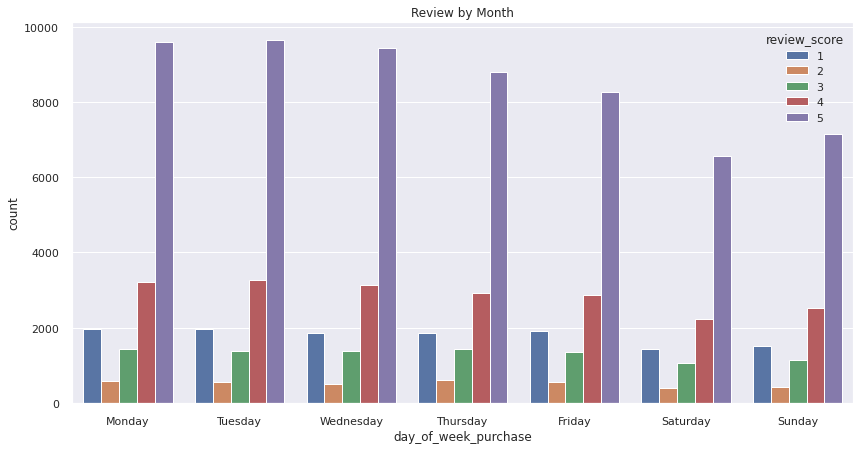

In [262]:
plt.figure(figsize=(14, 7))
plt.title('Review by Month')
sns.countplot(x='day_of_week_purchase', hue='review_score', data=data_merged_new)
plt.show()

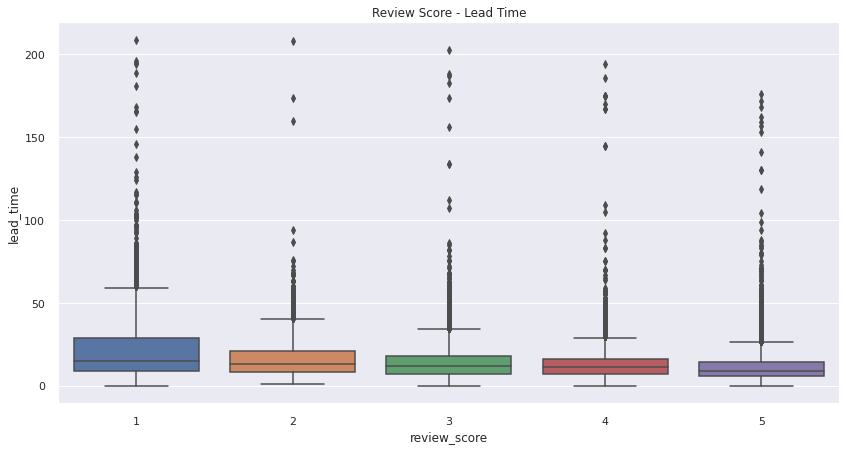

In [263]:
plt.figure(figsize=(14, 7))
plt.title('Review Score - Lead Time')
sns.boxplot(data=data_merged_new, x="review_score", y="lead_time")
plt.show()

from the plot, **the lower the lead time, the higher the review score**

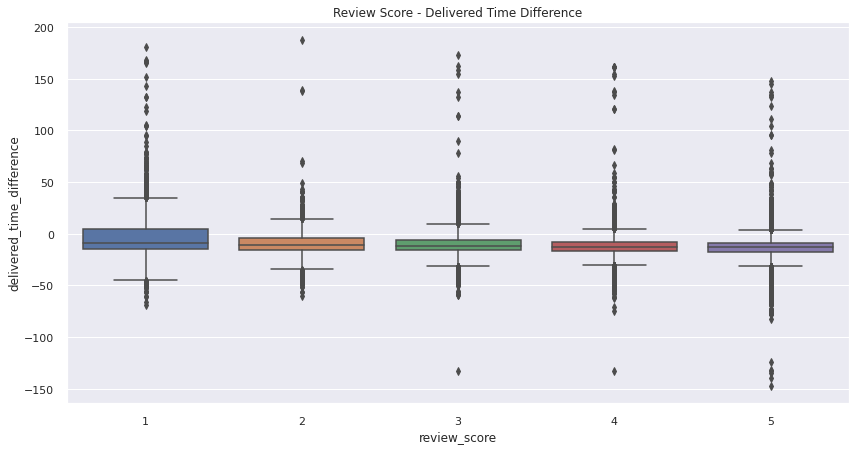

In [264]:
plt.figure(figsize=(14, 7))
plt.title('Review Score - Delivered Time Difference')
sns.boxplot(data=data_merged_new, x="review_score", y="delivered_time_difference")
plt.show()

From the plot, **the sooner the product delivered, the higher the review score**

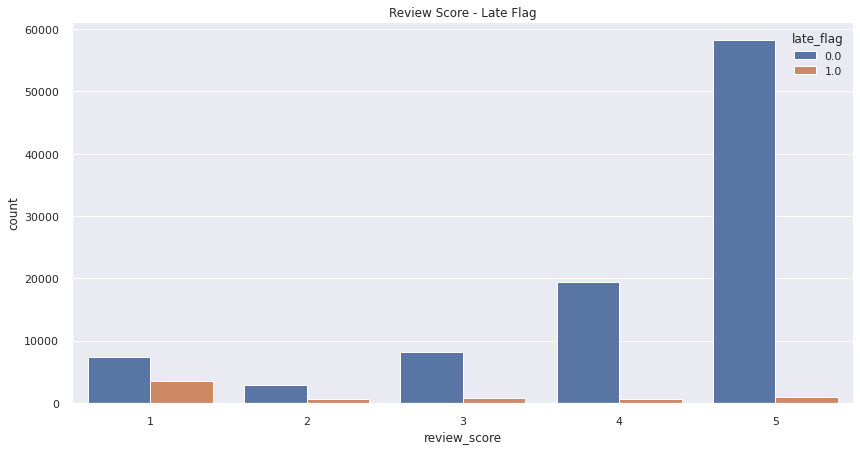

In [265]:
plt.figure(figsize=(14, 7))
plt.title('Review Score - Late Flag')
sns.countplot(data=data_merged_new, x="review_score", hue="late_flag")
plt.show()

From the plor, **late delivery tend to give bad review score**

**Delivery Performance**

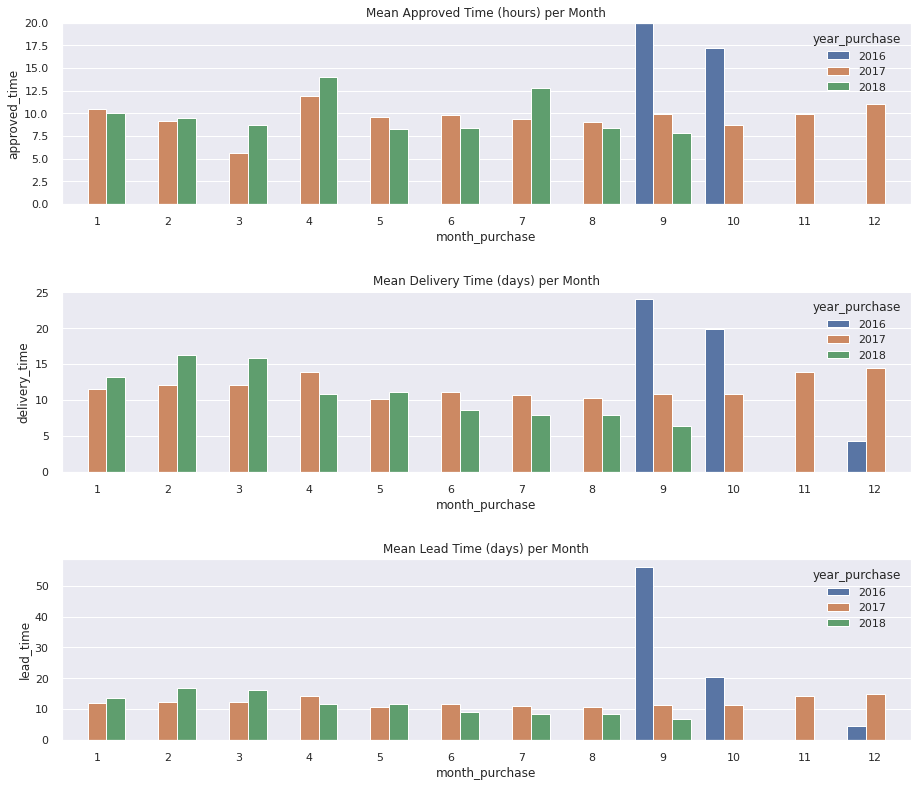

In [266]:
grouped_data_approved = data_merged_new.groupby(['month_purchase', 'year_purchase'], as_index=False)['approved_time'].mean()
grouped_data_delivery = data_merged_new.groupby(['month_purchase', 'year_purchase'], as_index=False)['delivery_time'].mean()
grouped_data_lead = data_merged_new.groupby(['month_purchase', 'year_purchase'], as_index=False)['lead_time'].mean()


fig, ax = plt.subplots(3, 1, figsize=(14, 12))
fig.tight_layout(pad=5.0)

ax[0].set_title('Mean Approved Time (hours) per Month')
ax[0].set_ylim(0, 20)
sns.barplot(x='month_purchase', y='approved_time', hue='year_purchase', data=grouped_data_approved, ax=ax[0])

ax[1].set_title('Mean Delivery Time (days) per Month')
sns.barplot(x='month_purchase', y='delivery_time', hue='year_purchase', data=grouped_data_delivery, ax=ax[1])

ax[2].set_title('Mean Lead Time (days) per Month')
sns.barplot(x='month_purchase', y='lead_time', hue='year_purchase', data=grouped_data_lead, ax=ax[2])
plt.show()

Delivery time and lead time tend to **have long time at the end of the year**

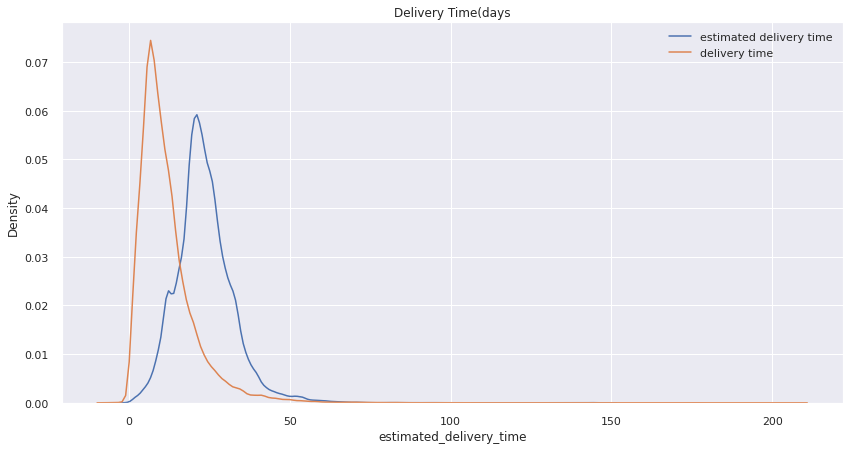

In [267]:
plt.figure(figsize=(14, 7))
plt.title('Delivery Time(days')
sns.kdeplot(x='estimated_delivery_time', data=data_merged_new, label='estimated delivery time')
sns.kdeplot(x='delivery_time', data=data_merged_new, label='delivery time')
plt.legend()
plt.show()

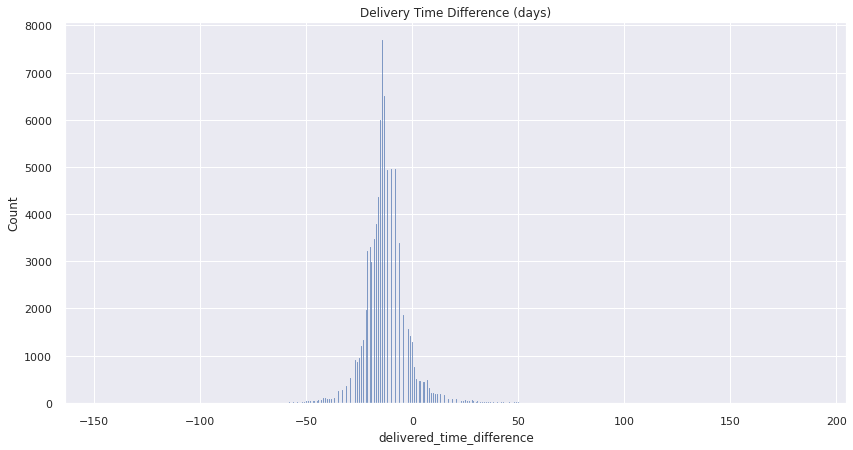

In [268]:
plt.figure(figsize=(14, 7))
plt.title('Delivery Time Difference (days)')
sns.histplot(x='delivered_time_difference', data=data_merged_new)
plt.show()

products ordered tend to **arrive earlier**

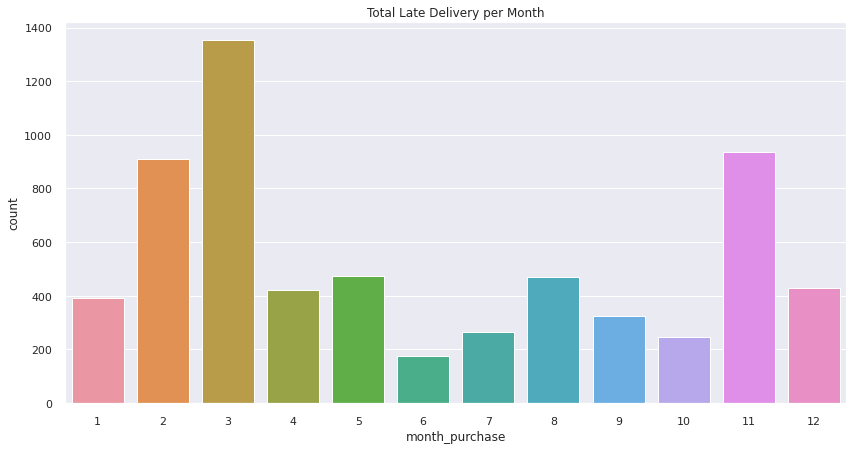

In [269]:
plt.figure(figsize=(14, 7))
plt.title('Total Late Delivery per Month')
sns.countplot(x='month_purchase', data=data_merged_new[data_merged_new['late_flag'] == 1])
plt.show()

The highest number of **late delivery** was in **March**

**Payment Trends**

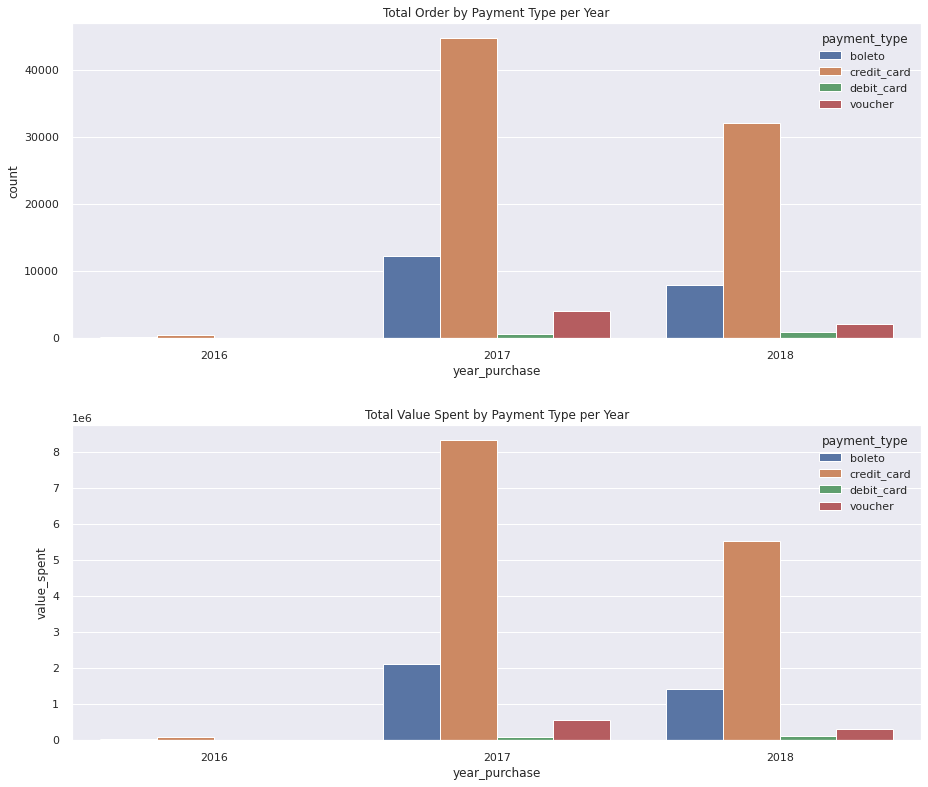

In [270]:
grouped_data = data_merged_new.groupby(['payment_type', 'year_purchase'], as_index=False)['value_spent'].sum()

fig, ax = plt.subplots(2, 1, figsize=(14, 12))
fig.tight_layout(pad=5.0)
ax[0].set_title('Total Order by Payment Type per Year')
sns.countplot(x='year_purchase', hue='payment_type', data=data_merged_new, ax=ax[0])

ax[1].set_title('Total Value Spent by Payment Type per Year')
sns.barplot(x='year_purchase', y='value_spent', hue='payment_type', data=grouped_data, ax=ax[1])
plt.show()

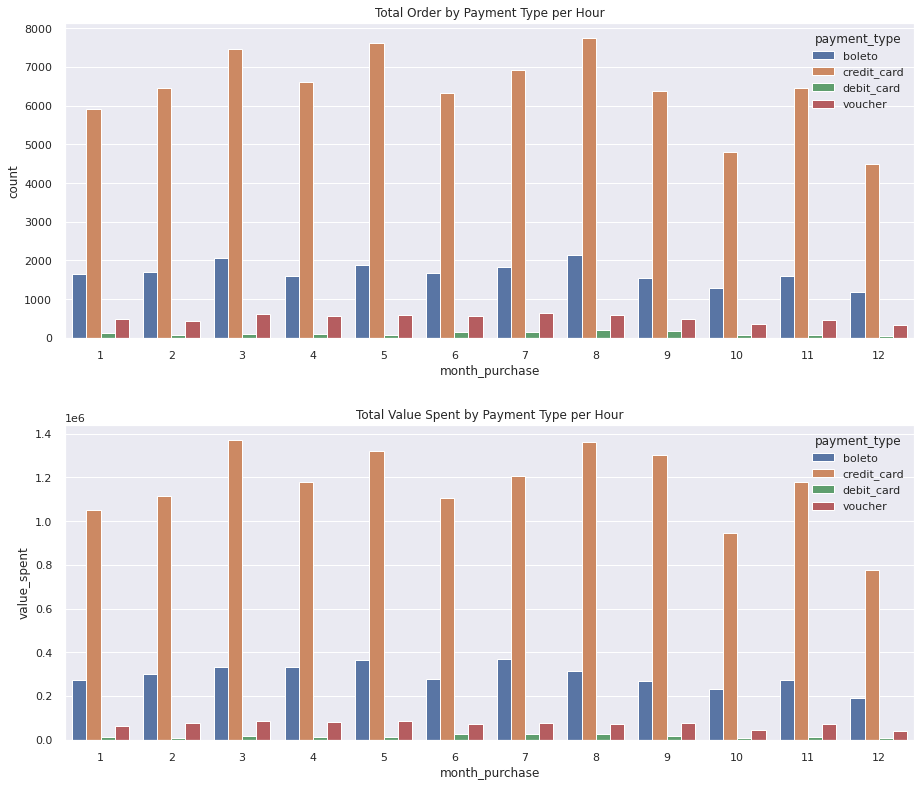

In [271]:
grouped_data = data_merged_new.groupby(['payment_type', 'month_purchase'], as_index=False)['value_spent'].sum()

fig, ax = plt.subplots(2, 1, figsize=(14, 12))
fig.tight_layout(pad=5.0)
ax[0].set_title('Total Order by Payment Type per Hour')
sns.countplot(x='month_purchase', hue='payment_type', data=data_merged_new, ax=ax[0])

ax[1].set_title('Total Value Spent by Payment Type per Hour')
sns.barplot(x='month_purchase', y='value_spent', hue='payment_type', data=grouped_data, ax=ax[1])
plt.show()

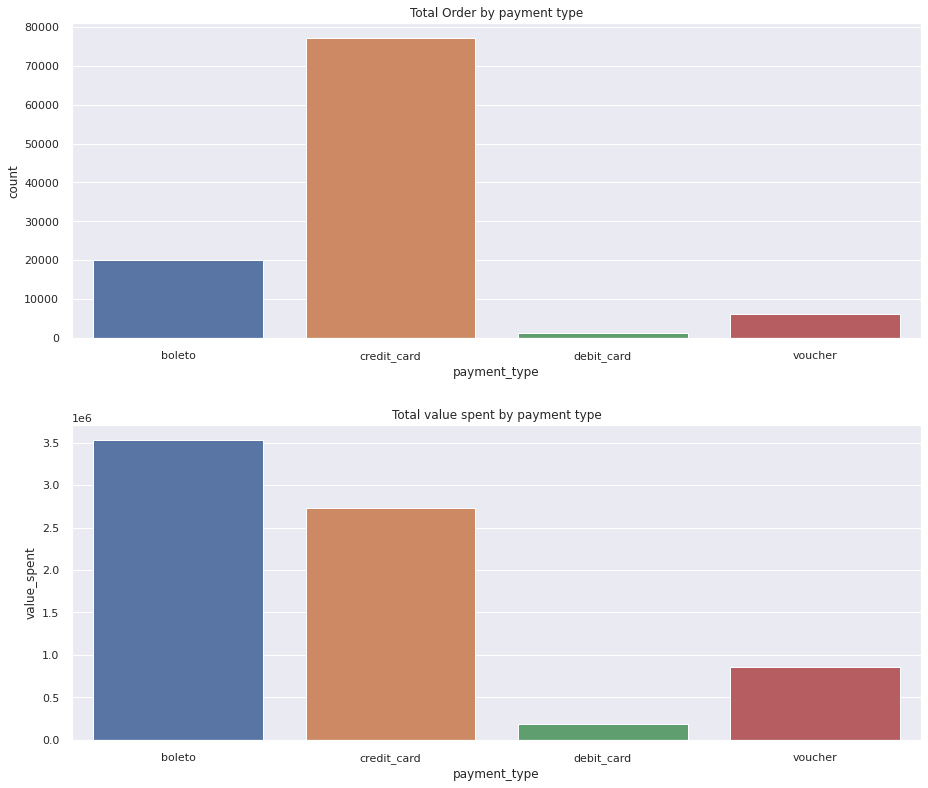

In [272]:
grouped_data = data_merged_new.groupby(['installments', 'payment_type'], as_index=False)['value_spent'].sum()
grouped_data = grouped_data[grouped_data['installments'] == 1]

fig, ax = plt.subplots(2, 1, figsize=(14, 12))
fig.tight_layout(pad=5.0)
ax[0].set_title('Total Order by payment type')
sns.countplot(x='payment_type', data=data_merged_new, ax=ax[0])

ax[1].set_title('Total value spent by payment type')
sns.barplot(x='payment_type', y='value_spent', data=grouped_data, ax=ax[1])
plt.show()

The most used payment method with installment 1 based on total order is **credit card**. The most used payment method with installment 1 based on total value spent is **boleto**

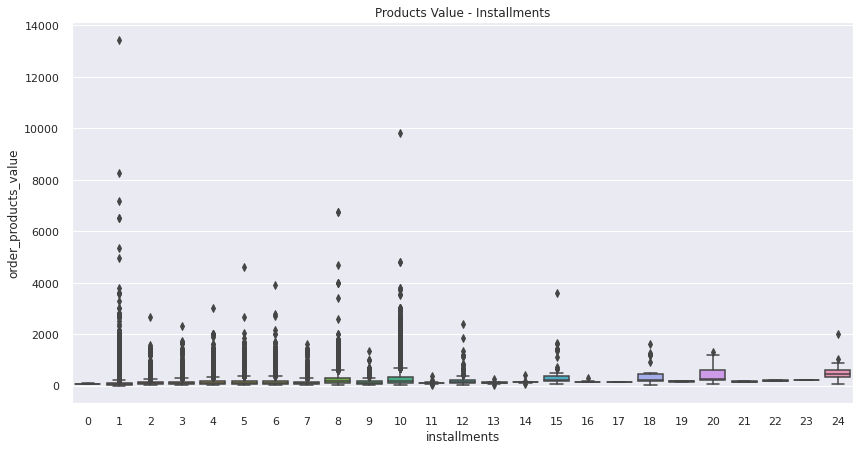

In [273]:
plt.figure(figsize=(14, 7))
plt.title('Products Value - Installments')
sns.boxplot(data=data_merged_new, x="installments", y="order_products_value")
plt.show()

From the plot, **the higher the product value, the higherthe number of installments**

**Inferences**
*   The higher the items quantity, the higher ther freight value
*   there is uptrend pattern from the total order for every month in 2017, but having downtrend in 2018. the trend is similar with the total value spent.
*   There is huge increase of total order and total value spent on 24th.
*   Customers tend to shop online at the beginning of weekday
*   Customers tend to shop online on the afternoon between 11am to 3pm
*   The top 3 city with highest total order and total value spent are sao paulo, rio de janeiro, and belo horizonte respectively
*   Top 3 product categories with highest total order are bed bath table, health beauty, and furniture decor respectively
*   Top 3 product categories with highest total value spent are watches gifts, bed bath table, and health beauty respectively.
*   the lower the lead time, the higher the review score
*   the sooner the product delivered, the higher the review score
*   late delivery tend to give bad review score
*   Delivery time and lead time tend to have long time at the end of the year
*   products ordered tend to arrive earlier
*   The highest number of late delivery was in March
*   The most used payment method with installment 1 based on total order is credit card
*   The most used payment method with installment 1 based on total value spent is boleto
*   the higher the product value, the higherthe number of installments



# **Problems and Hypothesis**

**Problems**

How to create specific target marketing based on purchase behavior

**Hypothesis**

Customers purchasing behavior have relationship with customer loyalty

**Possible Solution**

Create customer segmentation model based on customer purchasing behavior. Metrics will be used to represent customer purchasing behaviour is RFM Analysis.

# **Feature Engineering**

The RFM Customer Segmentation Model will be based on 3 factors:
1.   Recency(R): number of days since last purchase
2.   Frequency(F): total number of transactions
3.   Monetary(M): total amount spent of transactions



In [274]:
data_rfm = data_merged.copy()
data_rfm.head()

,order_id,order_status,order_products_value,order_freight_value,order_items_qty,order_sellers_qty,order_purchase_timestamp,order_aproved_at,order_estimated_delivery_date,order_delivered_customer_date,customer_id,customer_city,customer_state,product_name_lenght,product_description_lenght,product_photos_qty,review_score,customer_unique_id,product_category_name_english,installments,sequential,payment_type,value
0,b95df3cef5297e79ef709ba256518f6f,delivered,349.90,13.84,1,1,2017-01-31 17:19:01,2017-02-01 02:41:21.549551,2017-03-15,2017-02-06 11:04:24.154259,297dcf281305aabfee256d313076af2b,guaratuba,pr,51,625,1,5,a27e24da3a7dc34713304a30896a3c4e,health_beauty,1,1,boleto,363.74
1,e98077a0d199a25a40eab3b14cc230d4,delivered,39.99,15.23,1,2,2018-04-17 13:25:36,2018-04-18 13:31:35.349522,2018-05-10,2018-04-27 20:56:32.787589,5161d5feec98ade754f67746caf8e0c9,brasilia,df,51,405,2,5,c96f477f96ccbb7cb476a48ea6840098,health_beauty,7,1,credit_card,110.44
2,e98077a0d199a25a40eab3b14cc230d4,delivered,39.99,15.23,1,2,2018-04-17 13:25:36,2018-04-18 13:31:35.349522,2018-05-10,2018-04-27 20:56:32.787589,5161d5feec98ade754f67746caf8e0c9,brasilia,df,47,405,2,5,c96f477f96ccbb7cb476a48ea6840098,health_beauty,7,1,credit_card,110.44
3,8a723730400b508cbf47fbef4a76ec8e,delivered,60.00,20.91,1,1,2018-02-18 12:41:01,2018-02-18 13:46:36.606696,2018-03-14,2018-03-03 02:48:53.603256,f19376e0c54da9409485f7ef9556d367,belo horizonte,mg,38,1665,1,5,04533db2963aa82a202f214aeff155a6,health_beauty,1,1,credit_card,80.91
4,cf71b9b6b7ed12d72f541b0420023f19,delivered,79.99,10.94,1,1,2018-05-09 23:33:28,2018-05-11 02:57:52.916830,2018-05-24,2018-05-17 22:31:58.137648,12698ad9da6b62003811594de0ae297e,cachoeiro de itapemirim,es,59,492,3,4,0e37bd1acb9088c21332942d2a334cf7,health_beauty,1,1,boleto,90.93


In [275]:
data_rfm.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 104847 entries, 0 to 104846
Data columns (total 23 columns):
 #   Column                         Non-Null Count   Dtype         
---  ------                         --------------   -----         
 0   order_id                       104847 non-null  object        
 1   order_status                   104847 non-null  category      
 2   order_products_value           104847 non-null  float64       
 3   order_freight_value            104847 non-null  float64       
 4   order_items_qty                104847 non-null  int64         
 5   order_sellers_qty              104847 non-null  int64         
 6   order_purchase_timestamp       104847 non-null  datetime64[ns]
 7   order_aproved_at               104829 non-null  datetime64[ns]
 8   order_estimated_delivery_date  104847 non-null  datetime64[ns]
 9   order_delivered_customer_date  102322 non-null  datetime64[ns]
 10  customer_id                    104847 non-null  object        
 11  

**Handling Missing Value**



In [276]:
total = data_rfm.isnull().sum().sort_values(ascending=False)
percent = (100 * data_rfm.isnull().sum() / data_rfm.isnull().count()).sort_values(ascending=False)
missing_data = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])
missing_data

,Total,Percent
order_delivered_customer_date,2525,2.408271
order_aproved_at,18,0.017168
value,0,0.000000
customer_id,0,0.000000
order_status,0,0.000000
order_products_value,0,0.000000
order_freight_value,0,0.000000
order_items_qty,0,0.000000
order_sellers_qty,0,0.000000
order_purchase_timestamp,0,0.000000


Because total of missing value is below 5%, it is safe to drop the corresponding row with missing value. besides that, lets focus on delivered order data only

In [277]:
data_rfm = data_rfm.dropna()
data_rfm = data_rfm[data_rfm['order_status'] == 'delivered']
data_rfm = data_rfm.drop(columns='order_status')

In [278]:
data_rfm.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 102296 entries, 0 to 104846
Data columns (total 22 columns):
 #   Column                         Non-Null Count   Dtype         
---  ------                         --------------   -----         
 0   order_id                       102296 non-null  object        
 1   order_products_value           102296 non-null  float64       
 2   order_freight_value            102296 non-null  float64       
 3   order_items_qty                102296 non-null  int64         
 4   order_sellers_qty              102296 non-null  int64         
 5   order_purchase_timestamp       102296 non-null  datetime64[ns]
 6   order_aproved_at               102296 non-null  datetime64[ns]
 7   order_estimated_delivery_date  102296 non-null  datetime64[ns]
 8   order_delivered_customer_date  102296 non-null  datetime64[ns]
 9   customer_id                    102296 non-null  object        
 10  customer_city                  102296 non-null  category      
 11  

In [279]:
total = data_rfm.isnull().sum().sort_values(ascending=False)
percent = (100 * data_rfm.isnull().sum() / data_rfm.isnull().count()).sort_values(ascending=False)
missing_data = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])
missing_data

,Total,Percent
value,0,0.0
payment_type,0,0.0
order_products_value,0,0.0
order_freight_value,0,0.0
order_items_qty,0,0.0
order_sellers_qty,0,0.0
order_purchase_timestamp,0,0.0
order_aproved_at,0,0.0
order_estimated_delivery_date,0,0.0
order_delivered_customer_date,0,0.0


**Recency**

In [280]:
# For the max date, i give additional 1 day so the minimum recency is not 0 but 1
max_date = max(data_rfm['order_purchase_timestamp']) + pd.DateOffset(days=1)
data_rfm['recency'] = (max_date - data_rfm['order_purchase_timestamp']).dt.days
recency = data_rfm.groupby('customer_unique_id')['recency'].min()
recency = recency.reset_index()
recency

,customer_unique_id,recency
0,000329c0b406d30f7e92fbd6a88a009e,578
1,0003418b36ed466545169cac383b59b4,356
2,000446ff827ee6397d0f00816d6a1fb2,343
3,0004983adf3647e6c0bf708af02e94e4,359
4,0004e8eb194ba10ce76319ad18b09a5c,185
...,...,...
90300,fffc0b3c76112263d7f4d32348bdcab3,132
90301,fffc2b37ef75384dafa3c086f856f941,334
90302,fffc7c301df27a4ea9e279fb6f70c5d3,490
90303,fffcb0d79877f883b5a53492ec200f40,281


**Frequency**

In [281]:
frequency = data_rfm.groupby('customer_unique_id')['order_id'].count()
frequency = frequency.reset_index()
frequency.columns = ['customer_unique_id', 'frequency']
frequency

,customer_unique_id,frequency
0,000329c0b406d30f7e92fbd6a88a009e,1
1,0003418b36ed466545169cac383b59b4,1
2,000446ff827ee6397d0f00816d6a1fb2,1
3,0004983adf3647e6c0bf708af02e94e4,1
4,0004e8eb194ba10ce76319ad18b09a5c,1
...,...,...
90300,fffc0b3c76112263d7f4d32348bdcab3,1
90301,fffc2b37ef75384dafa3c086f856f941,2
90302,fffc7c301df27a4ea9e279fb6f70c5d3,1
90303,fffcb0d79877f883b5a53492ec200f40,1


**Monetary**

In [282]:
data_rfm['monetary'] = data_rfm['order_products_value'] * data_rfm['order_items_qty'] + data_rfm['order_freight_value']
monetary = data_rfm.groupby('customer_unique_id')['monetary'].sum()
monetary = monetary.reset_index()
monetary

,customer_unique_id,monetary
0,000329c0b406d30f7e92fbd6a88a009e,43.25
1,0003418b36ed466545169cac383b59b4,76.02
2,000446ff827ee6397d0f00816d6a1fb2,122.98
3,0004983adf3647e6c0bf708af02e94e4,38.78
4,0004e8eb194ba10ce76319ad18b09a5c,183.30
...,...,...
90300,fffc0b3c76112263d7f4d32348bdcab3,114.69
90301,fffc2b37ef75384dafa3c086f856f941,343.69
90302,fffc7c301df27a4ea9e279fb6f70c5d3,141.48
90303,fffcb0d79877f883b5a53492ec200f40,56.69


Merge all the data using customer unique id as key

In [283]:
data_rfm_merged = pd.merge(recency, frequency, on='customer_unique_id')
data_rfm_merged = pd.merge(data_rfm_merged, monetary, on='customer_unique_id')
data_rfm_merged.head()

,customer_unique_id,recency,frequency,monetary
0,000329c0b406d30f7e92fbd6a88a009e,578,1,43.25
1,0003418b36ed466545169cac383b59b4,356,1,76.02
2,000446ff827ee6397d0f00816d6a1fb2,343,1,122.98
3,0004983adf3647e6c0bf708af02e94e4,359,1,38.78
4,0004e8eb194ba10ce76319ad18b09a5c,185,1,183.30


**Outlier Analysis**

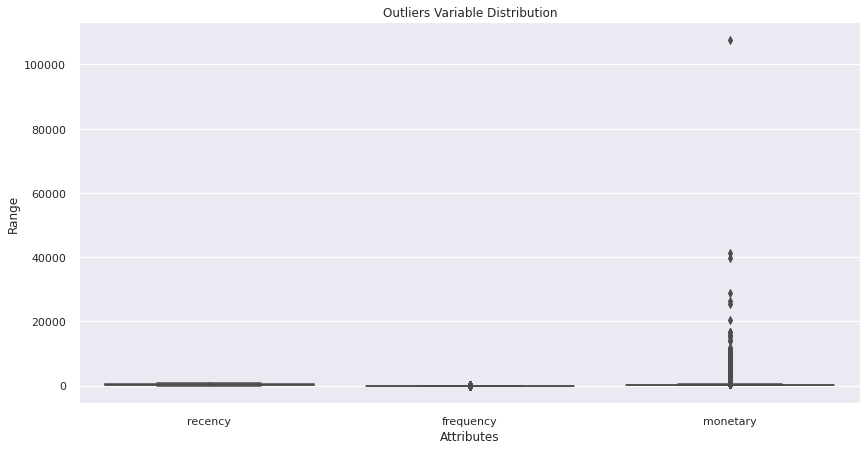

In [284]:
plt.figure(figsize=(14, 7))
sns.boxplot(data=data_rfm_merged[['recency','frequency','monetary']])
plt.title('Outliers Variable Distribution')
plt.ylabel('Range')
plt.xlabel('Attributes')
plt.show()

Handling Outlier for all attributes using Interquartile Rule

In [285]:
for attribute in ['recency', 'frequency', 'monetary']:
  Q1 = data_rfm_merged[attribute].quantile(0.05)
  Q3 = data_rfm_merged[attribute].quantile(0.95)
  IQR = Q3 - Q1

  data_rfm_merged = data_rfm_merged[(data_rfm_merged[attribute] >= Q1 - 1.5 * IQR) & (data_rfm_merged[attribute] <= Q3 + 1.5 * IQR)]

data_rfm_merged.head()

,customer_unique_id,recency,frequency,monetary
0,000329c0b406d30f7e92fbd6a88a009e,578,1,43.25
1,0003418b36ed466545169cac383b59b4,356,1,76.02
2,000446ff827ee6397d0f00816d6a1fb2,343,1,122.98
3,0004983adf3647e6c0bf708af02e94e4,359,1,38.78
4,0004e8eb194ba10ce76319ad18b09a5c,185,1,183.30


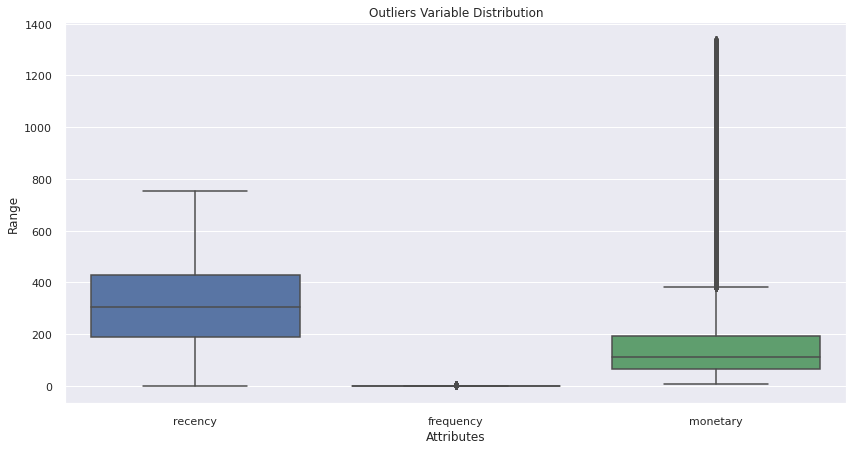

In [286]:
plt.figure(figsize=(14, 7))
sns.boxplot(data=data_rfm_merged[['recency','frequency','monetary']])
plt.title('Outliers Variable Distribution')
plt.ylabel('Range')
plt.xlabel('Attributes')
plt.show()

**Scale Data**

Scale the data using standardization method

In [287]:
rfm = data_rfm_merged[['recency', 'frequency', 'monetary']]

scaler = StandardScaler()

rfm = scaler.fit_transform(rfm)

rfm_scaled = pd.DataFrame(rfm)
rfm_scaled.columns = ['recency', 'frequency', 'monetary']
rfm_scaled.head()

,recency,frequency,monetary
0,1.723899,-0.276374,-0.713857
1,0.312610,-0.276374,-0.520221
2,0.229967,-0.276374,-0.242736
3,0.331681,-0.276374,-0.740270
4,-0.774464,-0.276374,0.113692


# **Customer Segmentation**

**Finding number of cluster**

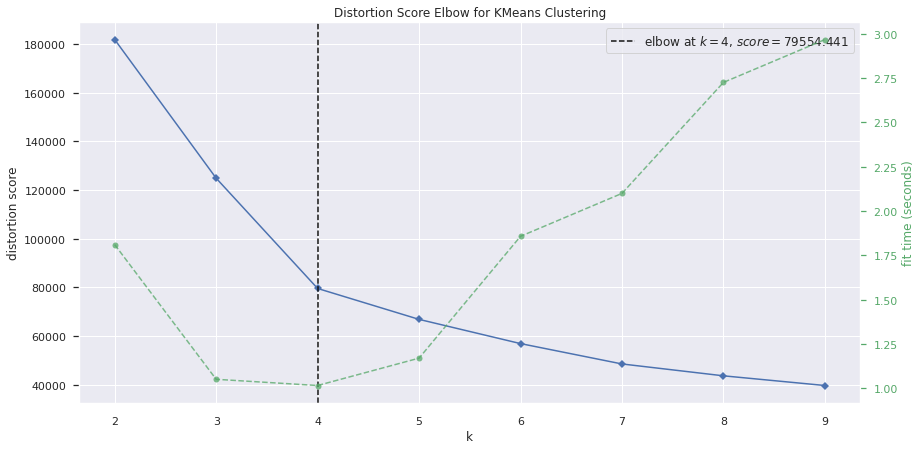

In [288]:
plt.figure(figsize=(14, 7))
kelbow_visualizer(KMeans(n_jobs=-1, random_state=8), rfm_scaled, k=(2, 10))
plt.show()

Based on the elbow method, the most optimal number of cluster is 4 clusters

In [289]:
kmeans = KMeans(n_clusters=4, n_jobs=-1, random_state=8)
kmeans.fit(rfm_scaled)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=4, n_init=10, n_jobs=-1, precompute_distances='auto',
       random_state=8, tol=0.0001, verbose=0)

In [290]:
data_rfm_merged['cluster'] = kmeans.labels_
data_rfm_merged.head()

,customer_unique_id,recency,frequency,monetary,cluster
0,000329c0b406d30f7e92fbd6a88a009e,578,1,43.25,0
1,0003418b36ed466545169cac383b59b4,356,1,76.02,0
2,000446ff827ee6397d0f00816d6a1fb2,343,1,122.98,0
3,0004983adf3647e6c0bf708af02e94e4,359,1,38.78,0
4,0004e8eb194ba10ce76319ad18b09a5c,185,1,183.30,1


**Cluster - Recency**

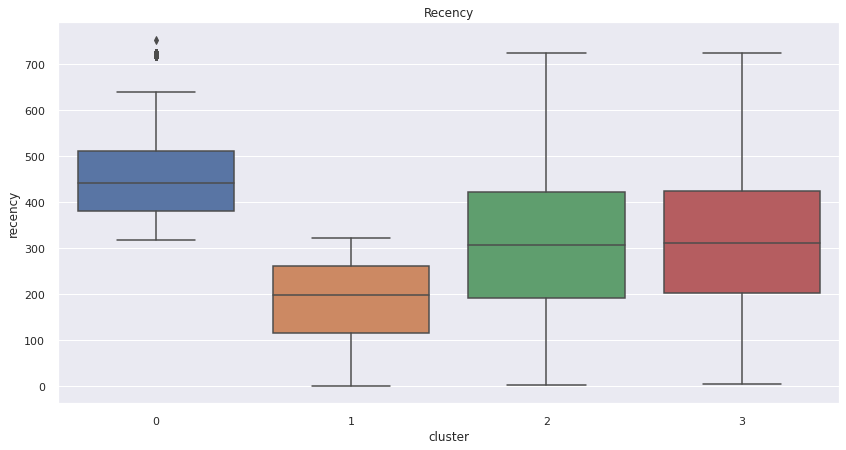

In [291]:
plt.figure(figsize=(14, 7))
plt.title('Recency')
sns.boxplot(x='cluster', y='recency', data=data_rfm_merged)
plt.show()

**Cluster - Frequency**

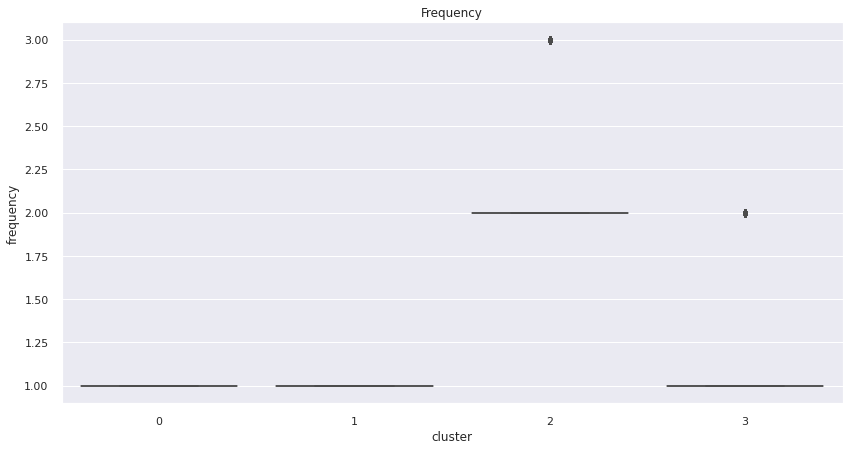

In [292]:
plt.figure(figsize=(14, 7))
plt.title('Frequency')
sns.boxplot(x='cluster', y='frequency', data=data_rfm_merged)
plt.show()

**Cluster - Monetary**

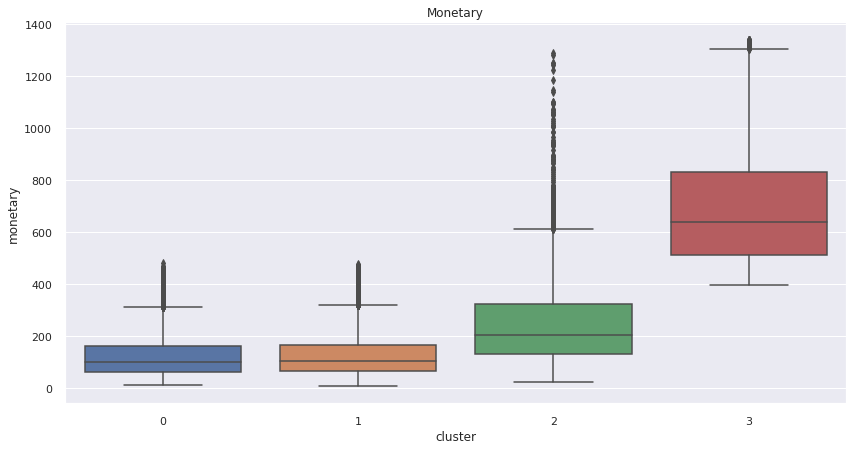

In [293]:
plt.figure(figsize=(14, 7))
plt.title('Monetary')
sns.boxplot(x='cluster', y='monetary', data=data_rfm_merged)
plt.show()

**Conclusion**

*   Cluster 0 is customers that are not recent buyers (Slipping - Once Loyal, Now Gone)
*   Cluster 1 is customers that are recent buyers (Rookies - Your Newest Customers)
*   Cluster 2 is customers that are frequent buyers (Promising - Faithful customers)
*   Cluster 3 is customers that have the highest amount spent (Whales - Your Highest Paying Customers)

